## EDA 

En este EDA se analizan datos de Yelp y Google Maps correspondientes al Estado de Florida, Estados Unidos

In [128]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Yelp

In [129]:
# Importacion de datasets Yelp
df_check_in = pd.read_csv('datasets/df_check_in.csv')

df_review = pd.read_csv('datasets/df_review.csv')

df_business = pd.read_csv('datasets/df_business.csv')

### Business

In [7]:
# Repeticiones de cada business_id
df_check_in['business_id'].value_counts()

business_id
sTPueJEwcRDj7ZJmG7okYA    5492
plobBsTtVUODb353xxFT_g    4930
RscMwBafa1cZh94tGlZT_Q    3862
_NozEKb4y0jkC08DWU8ywA    3692
kZ1q0K13tFYG_ZJrVvsJHA    3679
                          ... 
KsR_c2CPGN0Cgd7PUkuf0g       1
Kr1Ln95o-wZR9CYlLf2IOQ       1
q5SB5UYlmS-VMgCGq1Ku8A       1
dG38qUmIu3uCBF8gARAayA       1
ACsSGBWYxGG5FmjPyLhtRg       1
Name: count, Length: 3718, dtype: int64

In [8]:
df_business.head()


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,categories,hours
0,0bPLkL0QhhPO5kt1_EXmNQ,Zio's Italian Market,2575 E Bay Dr,Largo,FL,33771,27.916116,-82.760461,4.5,100,"Food, Delis, Italian, Bakeries, Restaurants","{'Monday': '10:0-18:0', 'Tuesday': '10:0-20:0'..."
1,7Du9oW73YcYFmXdtU5aiSg,Kinjo's Japanese Restaurant,2875 Tyrone Blvd N,Saint Petersburg,FL,33710,27.797263,-82.733913,3.5,17,"Japanese, Sushi Bars, Restaurants","{'Monday': '12:0-22:0', 'Tuesday': '12:0-22:0'..."
2,XwoXi0M66RU6Gouq-DSDHw,G Peppers Grill & Tavern,8745 Gunn Hwy,Odessa,FL,33556,28.092136,-82.578574,4.0,82,"Restaurants, Mexican, American (Traditional)","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
3,OfW-VK04qr7b7bPm5QbyLg,Taqueria Feliz,303 Horsham Rd,Horsham,FL,19044,40.180727,-75.134699,3.0,77,"Mexican, Pizza, Restaurants","{'Monday': '11:30-21:0', 'Tuesday': '11:30-21:..."
4,iBRXLFWD7PeSYDbKsd_JTw,Mai Thai Restaurant,875 E Bloomingdale Ave,Brandon,FL,33511,27.891574,-82.272510,4.5,27,"Food, Ethnic Food, Specialty Food, Restaurants...","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."


In [9]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   466 non-null    object 
 1   name          466 non-null    object 
 2   address       463 non-null    object 
 3   city          466 non-null    object 
 4   state         466 non-null    object 
 5   postal_code   466 non-null    int64  
 6   latitude      466 non-null    float64
 7   longitude     466 non-null    float64
 8   stars         466 non-null    float64
 9   review_count  466 non-null    int64  
 10  categories    466 non-null    object 
 11  hours         466 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 43.8+ KB


**Descripción general:**

- **Tamaño:** 466 registros (establecimientos) y 13 columnas (características).
- **Tipos de datos:**
    - `object`: business_id, name, address, city, state, postal_code, attributes, categories, hours.
    - `int64`:  postal_code, review_count.
    - `float64`: stars, latitude, longitude.

- **Variables nominales:**
    - `business_id`: identificador unico del establecimiento
    - `name`: nombre de usuario

- **Variables numéricas:**
    - `stars`: calificacion en 'estrellas'
    - `review_count`: numero de resenas recibidas

- **Variables categóricas:**
    - `address`: direccion del establecimiento
    - `city`: Ciudad en la que se encuentra
    - `state`: Estado en el que se encuentra
    - `postal_code`: Codigo postal correspondiente a localizacion del establecimiento.
    - `latitude`, `longitude`: coordenadas de localizacion
    - `categories`: lista de categorias que describen tipo de comida, tipo de negocio, etc.

- **Variables estructuradas**
    - `hours`: dias y horarios en los que se encuentra abierto el establecimiento


In [10]:
df_business.isna().sum()

business_id     0
name            0
address         3
city            0
state           0
postal_code     0
latitude        0
longitude       0
stars           0
review_count    0
categories      0
hours           0
dtype: int64

Se encontraron 3 nulos para la columna: address

In [11]:
duplicates_business = df_business.duplicated('business_id')
print(duplicates_business.sum())

0


No se encontraron duplicados

### Analisis de variables

Ciudades

In [12]:
# Separar establecimientos en gastronomicos y estaciones de servicio
restaurants = df_business[~df_business['categories'].str.contains('|'.join(['Gas Station', 'Gas','Fuel Station','Fuel']))]

gas_stations = df_business[df_business['categories'].str.contains('|'.join(['Gas Station', 'Gas','Fuel Station','Fuel']))]

In [13]:
# Estos registros se consideraran como franquicias al identificarse con el mismo nombre y encontrarse en distintas locaciones
restaurants = restaurants[restaurants.duplicated(subset='name', keep=False)]

In [14]:
# Frecuencias segun la ciudad
frecuencias_city = restaurants['city'].value_counts()
# Representacion de porcentajes para cada ciudad
porcentajes = (frecuencias_city / len(restaurants) * 100).round(2)

# Realizar un merge basado en la columna 'city'
distribucion_por_ciudad = pd.merge(frecuencias_city, porcentajes, on='city', how='inner')

# Renombrar columnas
distribucion_por_ciudad.rename(columns={'count_x': 'Cant_Restaurantes', 'count_y': '%'}, inplace=True)

# Visualizar
distribucion_por_ciudad

,Cant_Restaurantes,%
city,,
Tampa,31,50.00
Clearwater,8,12.90
Saint Petersburg,6,9.68
Largo,5,8.06
Brandon,4,6.45
Palm Harbor,4,6.45
Seminole,2,3.23
Lutz,2,3.23


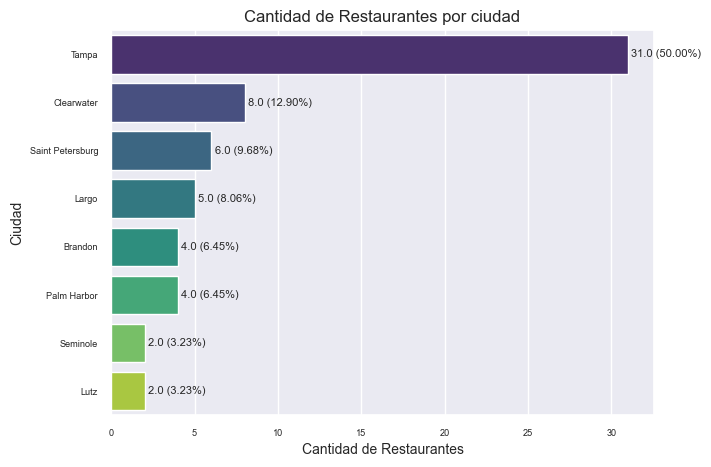

In [15]:
# Calcular el recuento de estaciones de servicio por ciudad
frecuencias_ciudad = restaurants['city'].value_counts()

# Calcular el porcentaje relativo para cada ciudad
porcentajes = (frecuencias_ciudad / len(restaurants) * 100).round(2)

# Fusionar los resultados en un DataFrame
distribucion_por_ciudad = pd.concat([frecuencias_ciudad, porcentajes], axis=1)
distribucion_por_ciudad.columns = ['Recuento', 'Porcentaje']

# Crear el gráfico de barras con la anchura proporcional al recuento
plt.figure(figsize=(7, 5))
sns.set(font_scale=0.6)
ax = sns.barplot(y=distribucion_por_ciudad.index, x='Recuento', data=distribucion_por_ciudad, palette="viridis", hue='city', dodge=False, legend=False)

# Agregar etiquetas con el recuento y el porcentaje relativo
for i, (index, row) in enumerate(distribucion_por_ciudad.iterrows()):
    count = row['Recuento']
    percentage = row['Porcentaje']
    ax.text(count + 0.2, i, f'{count} ({percentage:.2f}%)', ha='left', va='center', fontsize=8)

plt.title('Cantidad de Restaurantes por ciudad', fontsize=12)
plt.xlabel('Cantidad de Restaurantes', fontsize=10)
plt.ylabel('Ciudad', fontsize=10)

plt.show()

In [16]:
# Frecuencias segun la ciudad
frecuencias_city = gas_stations['city'].value_counts()
# Representacion de porcentajes para cada ciudad
porcentajes = (frecuencias_city / len(gas_stations) * 100).round(2)

# Realizar un merge basado en la columna 'city'
distribucion_por_ciudad = pd.merge(frecuencias_city, porcentajes, on='city', how='inner')

# Renombrar columnas
distribucion_por_ciudad.rename(columns={'count_x': 'Cant_EstacionesServicio', 'count_y': '%'}, inplace=True)

# Visualizar
distribucion_por_ciudad

,Cant_EstacionesServicio,%
city,,
Tampa,12,48.0
Clearwater,6,24.0
Horsham,2,8.0
Odessa,1,4.0
Palm Harbor,1,4.0
Brandon,1,4.0
Saint Petersburg,1,4.0
Oldsmar,1,4.0


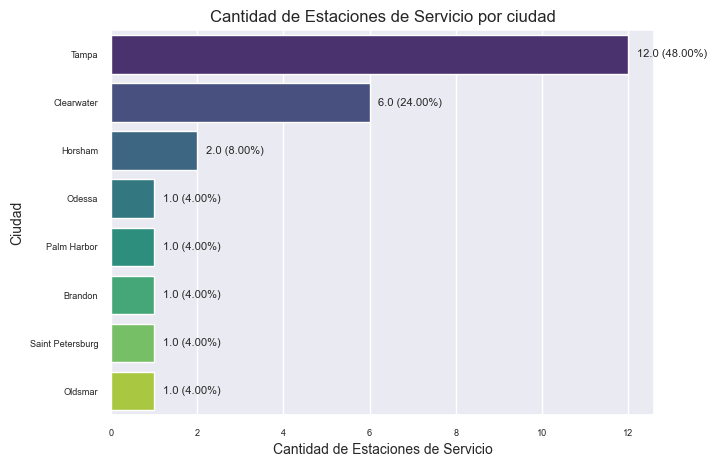

In [17]:
# Calcular el recuento de estaciones de servicio por ciudad
frecuencias_ciudad = gas_stations['city'].value_counts()

# Calcular el porcentaje relativo para cada ciudad
porcentajes = (frecuencias_ciudad / len(gas_stations) * 100).round(2)

# Fusionar los resultados en un DataFrame
distribucion_por_ciudad = pd.concat([frecuencias_ciudad, porcentajes], axis=1)
distribucion_por_ciudad.columns = ['Recuento', 'Porcentaje']

# Crear el gráfico de barras con la anchura proporcional al recuento
plt.figure(figsize=(7, 5))
sns.set(font_scale=0.6)
ax = sns.barplot(y=distribucion_por_ciudad.index, x='Recuento', data=distribucion_por_ciudad, palette="viridis", hue='city', dodge=False, legend=False)

# Agregar etiquetas con el recuento y el porcentaje relativo
for i, (index, row) in enumerate(distribucion_por_ciudad.iterrows()):
    count = row['Recuento']
    percentage = row['Porcentaje']
    ax.text(count + 0.2, i, f'{count} ({percentage:.2f}%)', ha='left', va='center', fontsize=8)

plt.title('Cantidad de Estaciones de Servicio por ciudad', fontsize=12)
plt.xlabel('Cantidad de Estaciones de Servicio', fontsize=10)
plt.ylabel('Ciudad', fontsize=10)

plt.show()

Franquicias

In [227]:
# Cantidad de franquicias
cant_franc = restaurants['name'].nunique()
print(f'Se encontraron {cant_franc} Franquicias diferentes en el estado de Florida segun los datos de Yelp')

Se encontraron 20 Franquicias diferentes en el estado de Florida segun los datos de Yelp


In [194]:
# Calcular el recuento total para cada name
frecuencias_name = restaurants['name'].value_counts()

# Calcular el porcentaje relativo para cada name
porcentajes = (frecuencias_name / len(restaurants) * 100).round(2)

# Fusionar los resultados en un DataFrame
distribucion_por_franquicia = pd.concat([frecuencias_name, porcentajes], axis=1)
distribucion_por_franquicia.columns = ['Cant_Restaurantes', '%']

# Calcular el recuento de cada name por city
recuento_name_por_ciudad = restaurants.groupby(['name', 'city']).size().unstack(fill_value=0)

# Fusionar los resultados con el DataFrame principal
distribucion_por_franquicia = distribucion_por_franquicia.merge(recuento_name_por_ciudad, how='left', left_index=True, right_index=True)

# Visualizar DataFrame
distribucion_por_franquicia

,Cant_Restaurantes,%,Brandon,Clearwater,Largo,Lutz,Palm Harbor,Saint Petersburg,Seminole,Tampa
name,,,,,,,,,,
Taco Bell,9,14.52,1,2,1,0,1,1,1,2
Pizza Hut,6,9.68,0,2,1,0,0,1,0,2
Olive Garden Italian Restaurant,4,6.45,0,1,0,0,0,0,0,3
Hungry Howie's Pizza & Subs,4,6.45,0,1,0,0,1,0,1,1
Taco Bus,4,6.45,0,1,0,0,0,1,0,2
Little Greek Restaurant,3,4.84,0,0,1,0,0,0,0,2
Tijuana Flats,3,4.84,0,0,1,1,0,0,0,1
Pita's Republic,3,4.84,0,0,0,0,1,0,0,2
Chipotle Mexican Grill,3,4.84,0,0,0,1,0,1,0,1


En la tabla anterior podemos ver la cantidad de sucursales por franquicia y las ciudades en las que estas se distribuyen

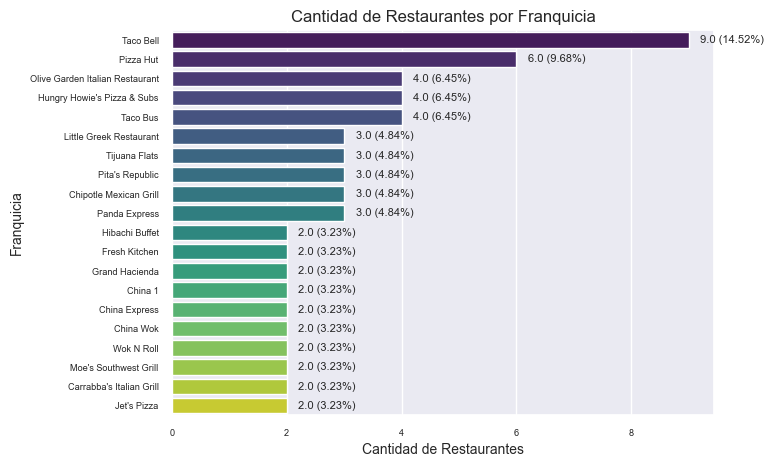

In [195]:
# Calcular el recuento de cada franquicia
frecuencias_name = restaurants['name'].value_counts()

# Calcular el porcentaje relativo para cada franquicia
porcentajes = (frecuencias_name / len(restaurants) * 100).round(2)

# Fusionar los resultados en un DataFrame
distribucion_por_franquicia = pd.concat([frecuencias_name, porcentajes], axis=1)
distribucion_por_franquicia.columns = ['Recuento', 'Porcentaje']

# Crear el gráfico de barras con la anchura proporcional al recuento
plt.figure(figsize=(7, 5))
sns.set(font_scale=0.6)
ax = sns.barplot(x='Recuento', y=distribucion_por_franquicia.index, data=distribucion_por_franquicia, palette="viridis", hue='name', dodge=False, legend=False)

# Agregar etiquetas con el recuento y el porcentaje relativo
for i, (index, row) in enumerate(distribucion_por_franquicia.iterrows()):
    count = row['Recuento']
    percentage = row['Porcentaje']
    ax.text(count + 0.2, i, f'{count} ({percentage:.2f}%)', ha='left', va='center', fontsize=8)

plt.title('Cantidad de Restaurantes por Franquicia', fontsize=12)
plt.xlabel('Cantidad de Restaurantes', fontsize=10)
plt.ylabel('Franquicia', fontsize=10)

plt.show()

Puntuacion promedio por franquicia

In [21]:
# Calcular la puntuación promedio de cada franquicia
puntuacion_promedio_por_franquicia = restaurants.groupby('name')['stars'].mean().round(2).to_frame().sort_values(by='stars', ascending=False)

# Visualizar el resultado
puntuacion_promedio_por_franquicia

,stars
name,
Fresh Kitchen,4.50
Pita's Republic,4.00
Little Greek Restaurant,3.83
Tijuana Flats,3.83
China Wok,3.75
Carrabba's Italian Grill,3.50
Wok N Roll,3.50
Taco Bus,3.38
Grand Hacienda,3.25


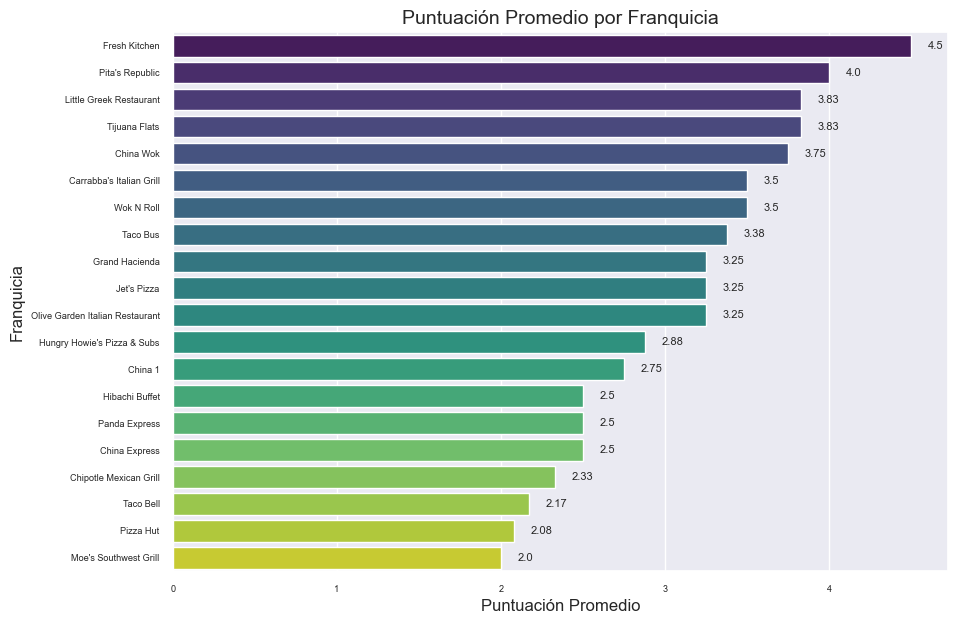

In [22]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 7))
sns.barplot(x='stars', y='name', data=puntuacion_promedio_por_franquicia, palette="viridis", hue='name', dodge=False, legend=False)

# Configurar título y etiquetas de ejes
plt.title('Puntuación Promedio por Franquicia', fontsize=14)
plt.xlabel('Puntuación Promedio', fontsize=12)
plt.ylabel('Franquicia', fontsize=12)

# Agregar etiquetas con el recuento y el porcentaje relativo
for i, (index, row) in enumerate(puntuacion_promedio_por_franquicia.iterrows()):
    prom = row['stars']
    plt.text(prom + 0.1, i, f'{prom}', ha='left', va='center', fontsize=8)

# Mostrar el gráfico
plt.show()

Las franquicias con mejor puntuacion promedio son:
*  Fresh Kitchen	4.50
* Pita's Republic	4.00
* Little Greek Restaurant	3.83
* Tijuana Flats	3.83
* China Wok	3.75

Variacion de la puntuacion segun sucursales de la misma franquicia

In [23]:
# Establece las opciones de visualización de pandas para mostrar todas las filas y columnas
pd.set_option('display.max_rows', 62)  # Muestra todas las filas
pd.set_option('display.max_columns', 20)  # Muestra todas las columnas

In [24]:
# Calcular el puntaje promedio de 'stars' según 'name' y 'city'
franquicia_ciudad = restaurants[['name', 'city','stars']]

# Ordenar segun Franquicias
franquicia_ciudad = franquicia_ciudad.sort_values('name')
franquicia_ciudad = franquicia_ciudad.reset_index(drop=True)

# Establecer name como indice
franquicia_ciudad = franquicia_ciudad.set_index('name')

# Calcular la Variacion de puntaje entre distintas sucursales de la misma franquicia
franquicia_ciudad['stars_var'] = franquicia_ciudad['stars'].groupby(level=0).var().round(3)

# Reordenar indice por name
franquicia_ciudad = franquicia_ciudad.sort_index()

# Mostrar el DataFrame resultante
franquicia_ciudad

,city,stars,stars_var
name,,,
Carrabba's Italian Grill,Tampa,3.5,0.000
Carrabba's Italian Grill,Tampa,3.5,0.000
China 1,Tampa,2.5,0.125
China 1,Tampa,3.0,0.125
China Express,Largo,1.5,2.000
China Express,Brandon,3.5,2.000
China Wok,Tampa,3.5,0.125
China Wok,Tampa,4.0,0.125
Chipotle Mexican Grill,Tampa,2.5,0.083


1. **Franquicia con Mayor Variación:**
   - Nombre: China Express
   - Variación: 2.00

2. **Variación Promedio por Franquicia:**
   - Variación Promedio: 0.362
   - Desviación Estándar de la Variación: 0.380

3. **Franquicias con Mayor y Menor Variación:**

|Franquicia	|	Variación (stars_var)|
|-----------|-----------------------|
|Taco Bell	| 0.50 |
|Moe's Southwest Grill |	0.50 |
|Hibachi Buffet |		0.50 |
|Taco Bell	|	0.50 |
|China Express	| 2.00 |
|China Express	| 2.00 |
|Pizza Hut	| 0.34 |
|Pizza Hut	| 0.34 |
|Pizza Hut	| 0.34 |
|Pizza Hut	| 0.34 |

Observación: Las franquicias con mayor variación tienen puntuaciones más dispersas, indicando que algunas sucursales reciben calificaciones muy diferentes. Las franquicias con menor variación tienen puntuaciones más homogéneas, sugiriendo una experiencia consistente en sus distintas sucursales.

Total de reviews por franquicia

In [25]:
franquicias_con_mas_reviews = restaurants.groupby('name')['review_count'].sum().to_frame().sort_values(by='review_count', ascending=False).reset_index(drop=False)

# Visualizar el resultado
franquicias_con_mas_reviews.head(10)

,name,review_count
0,Taco Bus,1496
1,Fresh Kitchen,904
2,Olive Garden Italian Restaurant,436
3,Grand Hacienda,303
4,Little Greek Restaurant,276
5,Chipotle Mexican Grill,243
6,Taco Bell,236
7,Carrabba's Italian Grill,150
8,Hibachi Buffet,146
9,Tijuana Flats,129


La franquicia con mayor cantidad de reviews es 'Taco Bus' con 1496 reviews

Relacion entre total de reviews por franquicia y puntuacion promedio

In [26]:
# Añadir la columna 'stars' del DataFrame 'puntuacion_promedio_por_franquicia' a 'franquicias_con_mas_reviews'
franquicias_reviews_puntuacion = pd.merge(franquicias_con_mas_reviews, puntuacion_promedio_por_franquicia[['stars']], on='name')
franquicias_reviews_puntuacion = franquicias_reviews_puntuacion.sort_values(by='review_count', ascending=False)

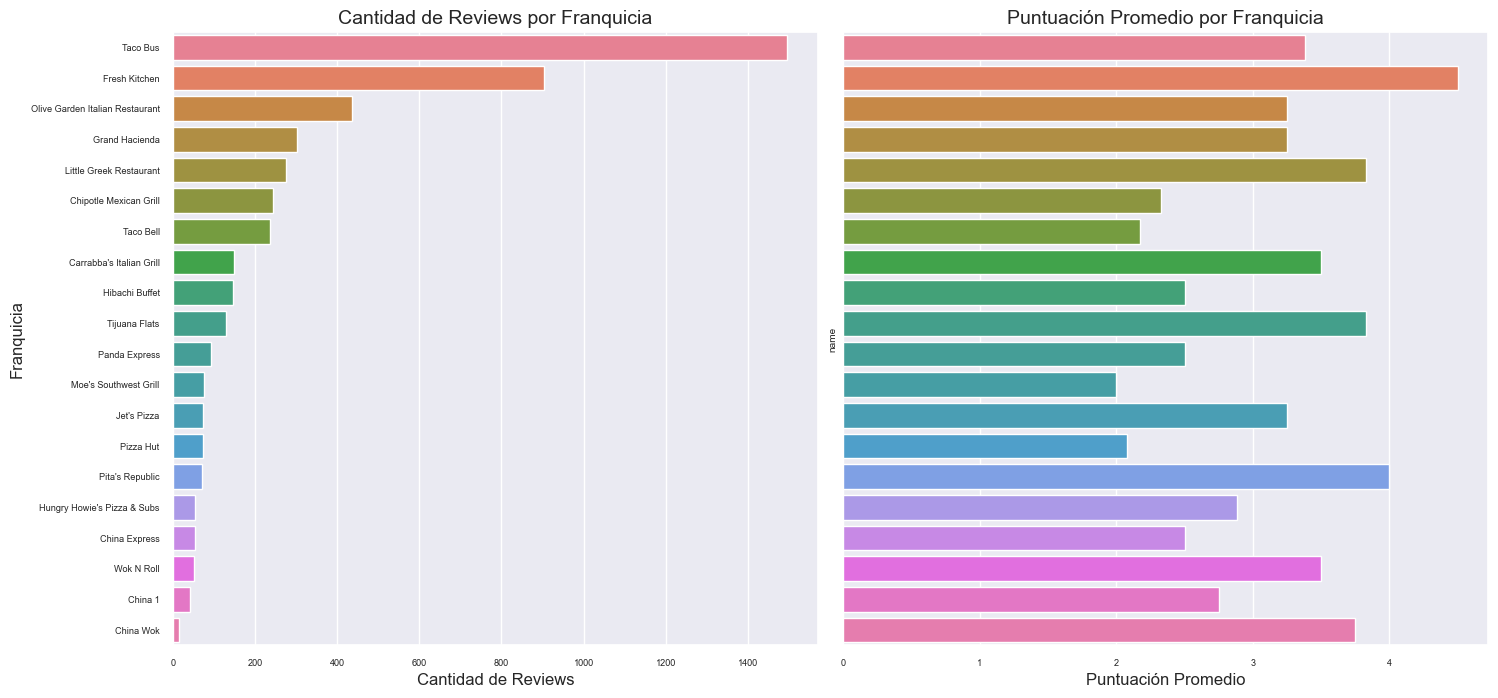

In [27]:
# Configurar el tamaño de la figura
plt.figure(figsize=(15, 7))

# Crear el primer gráfico de barras (cantidad de reviews por franquicia)
plt.subplot(1, 2, 1)  # Organizar en una matriz de 1 fila y 2 columnas, y seleccionar el primer subplot
sns.barplot(x='review_count', y='name', data=franquicias_reviews_puntuacion, hue='name', dodge=False, legend=False)
plt.title('Cantidad de Reviews por Franquicia', fontsize=14)
plt.xlabel('Cantidad de Reviews', fontsize=12)
plt.ylabel('Franquicia', fontsize=12)

# Crear el segundo gráfico de barras (puntuación promedio por franquicia)
plt.subplot(1, 2, 2)  # Seleccionar el segundo subplot
sns.barplot(x='stars', y='name', data=franquicias_reviews_puntuacion, hue='name', dodge=False, legend=False)
plt.title('Puntuación Promedio por Franquicia', fontsize=14)
plt.xlabel('Puntuación Promedio', fontsize=12)
plt.yticks([])  # Ocultar las marcas y etiquetas del eje y del segundo subplot

# Ajustar el diseño y mostrar los gráficos
plt.tight_layout()
plt.show()


Observamos que aquellas franquicias con mayor cantidad de reviews, a partir de 276,	tienen una puntuacion promedio (en una escala de 1 a 5), entre 3.25 y 4.5

Por otro lado las franquicias con un recuento de reviews menor, tienen una puntuacion promedio entre 2 y 3.83.
- El 56% de estas no superan una puntuacion de 2.88
- El 44% restante de los casos no supera tiene una puntuacion entre 3.25 y 3.83

Puede decirse que hay una tendencia a tener una mejor puntuacion si el numero de reviews es mayor. Pero deberian analizarse mayor cantidad de datos para confirmar esta hipotesis.

Categorias:

In [244]:
# Lista de palabras clave
palabras_clave = ['Chinese','Indian','Thai','Italian','Greek','Helthy','Latin','Mexican','Argentinian','Peruvian','Colombian','Arepas','Japanese','Sushi','Ramen','Korean','Vietnamese','Ethiopian','Nigerian','Lebanese','Israeli','Iranian','Asian','African','Middle Eastern','Healthy','Vegetarian','Vegan','Gluten-free','Fresh','Seasonal','Casual']

# Función para encontrar palabras clave en la columna 'categories'
def encontrar_palabra_clave(categories):
    for palabra in palabras_clave:
        if palabra in categories:
            return palabra
    return None

# Crear nueva columna con la palabra clave encontrada
restaurants_categories = restaurants[['name','city','state','stars']].copy()
restaurants_categories['keyword'] = restaurants['categories'].apply(encontrar_palabra_clave)
restaurants_categories = restaurants_categories.sort_values(by='keyword').reset_index(drop=True)

# Ver restaurants_categories
restaurants_categories.head()

,name,city,state,stars,keyword
0,China 1,Tampa,FL,2.5,Chinese
1,China Wok,Tampa,FL,3.5,Chinese
2,China 1,Tampa,FL,3.0,Chinese
3,Wok N Roll,Tampa,FL,3.5,Chinese
4,Panda Express,Tampa,FL,2.5,Chinese


In [245]:
# Contabilizar keywords diferentes
cant_keywords = restaurants_categories['keyword'].nunique()
print(f'Se encontraron {cant_keywords} categorias diferentes entre las franquicias analisadas.')

Se encontraron 6 categorias diferentes entre las franquicias analisadas.


In [246]:
# Frecuencias según la categoría
frecuencias_keyword = restaurants_categories['keyword'].value_counts()

# Representación de porcentajes para cada categoría
porcentajes = (frecuencias_keyword / len(restaurants_categories) * 100).round(2)

# Crear DataFrame para las frecuencias y porcentajes
distribucion_por_categoria = pd.DataFrame({'RestPorCategoria': frecuencias_keyword, '%': porcentajes})

# Resetear el índice para permitir el merge
distribucion_por_categoria.reset_index(inplace=True)

# Renombrar columnas
distribucion_por_categoria.rename(columns={'index': 'keyword'}, inplace=True)

# Visualizar
distribucion_por_categoria

,keyword,RestPorCategoria,%
0,Mexican,23,37.10
1,Italian,18,29.03
2,Chinese,13,20.97
3,Greek,5,8.06
4,Vegetarian,2,3.23
5,Middle Eastern,1,1.61


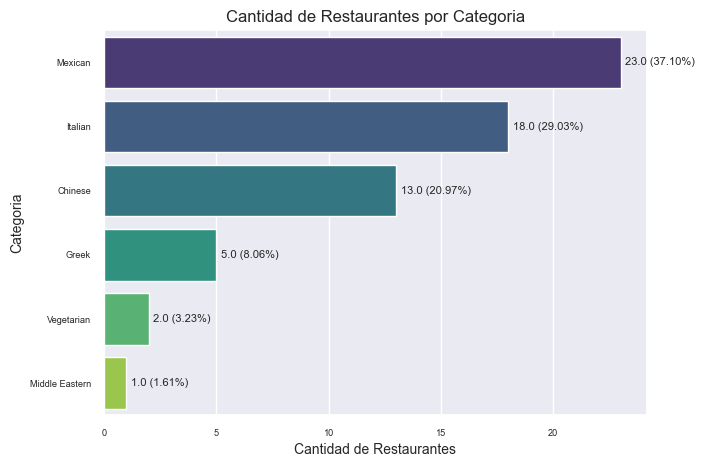

In [247]:
# Calcular el porcentaje relativo para cada franquicia
porcentajes = (frecuencias_keyword / len(restaurants) * 100).round(2)

# Fusionar los resultados en un DataFrame
distribucion_por_categoria = pd.concat([frecuencias_keyword, porcentajes], axis=1)
distribucion_por_categoria.columns = ['Recuento', 'Porcentaje']

# Crear el gráfico de barras con la anchura proporcional al recuento
plt.figure(figsize=(7, 5))
sns.set(font_scale=0.6)
ax = sns.barplot(x='Recuento', y=distribucion_por_categoria.index, data=distribucion_por_categoria, palette="viridis", hue='keyword', dodge=False, legend=False)

# Agregar etiquetas con el recuento y el porcentaje relativo
for i, (index, row) in enumerate(distribucion_por_categoria.iterrows()):
    count = row['Recuento']
    percentage = row['Porcentaje']
    ax.text(count + 0.2, i, f'{count} ({percentage:.2f}%)', ha='left', va='center', fontsize=8)

plt.title('Cantidad de Restaurantes por Categoria', fontsize=12)
plt.xlabel('Cantidad de Restaurantes', fontsize=10)
plt.ylabel('Categoria', fontsize=10)

plt.show()

La categoría más popular es la Mexicana con un 37.10% de las palabras clave, seguida por la Italiana con un 29.03%. La categoría China también tiene una presencia considerable con un 20.97%. Las categorías Griega, Vegetarian y Medio Oriente tienen una menor representación con un 8.06%, 3.23% y 1.61% respectivamente.

La información proporcionada indica que las categorías de restaurantes más populares son la Mexicana, Italiana y China.

### Check-in

In [28]:
# Obtener los 'business_id' únicos de metadata
business_ids_restaurants = restaurants['business_id'].unique()

# Filtrar los registros de df_check_in que coinciden con los 'business_id' de metadata
df_check_in = df_check_in[df_check_in['business_id'].isin(business_ids_restaurants)]

In [29]:
# Filtrar las filas que comienzan a partir de "2022" en la columna 'date'
df_check_in = df_check_in[df_check_in['date'].str.startswith('2022', '2023')].reset_index(drop=True)

In [30]:
# Explora los primeros registros del DataFrame
df_check_in.head()

,business_id,date,hour
0,4lq9BmUFUOU8eQXdJ1naog,2022-01-08,23:14:07
1,9EoNx6yHsmiCe43XscJzDA,2022-01-02,18:08:04
2,9EoNx6yHsmiCe43XscJzDA,2022-01-04,23:07:24
3,9EoNx6yHsmiCe43XscJzDA,2022-01-09,21:07:39
4,9EoNx6yHsmiCe43XscJzDA,2022-01-10,18:29:46


In [31]:
df_check_in['business_id'] = df_check_in['business_id'].str.lstrip('---')
df_check_in

,business_id,date,hour
0,4lq9BmUFUOU8eQXdJ1naog,2022-01-08,23:14:07
1,9EoNx6yHsmiCe43XscJzDA,2022-01-02,18:08:04
2,9EoNx6yHsmiCe43XscJzDA,2022-01-04,23:07:24
3,9EoNx6yHsmiCe43XscJzDA,2022-01-09,21:07:39
4,9EoNx6yHsmiCe43XscJzDA,2022-01-10,18:29:46
5,WkcmS4_R6iCUdxuNEEcM-Q,2022-01-01,23:42:22
6,baxAe39nPgmAhkNwqvoHnQ,2022-01-17,22:36:57
7,mDTJ6OVTQhBk6b_wK32YfA,2022-01-13,18:42:44
8,pi1CtS1L_Rd1NcmO-un1cQ,2022-01-03,00:52:56
9,pi1CtS1L_Rd1NcmO-un1cQ,2022-01-08,22:18:42


In [32]:
# Obtener tipo de datos del DataFrame
df_check_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  12 non-null     object
 1   date         12 non-null     object
 2   hour         12 non-null     object
dtypes: object(3)
memory usage: 420.0+ bytes


**Descripción general:**

- **Tamaño:**  12 registros (confirmaciones de reservas) y 3 columnas (establecimiento, fecha y hora).
- **Tipos de datos:**
    - `object`: business_id, date, hour.

- **Variables nominales:**
    - `business_id`: Identificador único del establecimiento.

- **Variables categóricas:**
    - `date`: Fecha  de confirmación de reserva.
    - `hour`: Hora de confirmación de reserva.
 

In [33]:
# Obtén estadísticas descriptivas del DataFrame
df_check_in.describe()

,business_id,date,hour
count,12,12,12
unique,6,10,12
top,9EoNx6yHsmiCe43XscJzDA,2022-01-08,23:14:07
freq,4,2,1


In [34]:
duplicates = df_check_in.duplicated()
print(duplicates.sum())

0


In [35]:
df_check_in = df_check_in.drop_duplicates()

In [36]:
df_check_in.isna().sum()

business_id    0
date           0
hour           0
dtype: int64

No se encontraron nulos

No se realizara un analisis de mayor de esta tabla hasta no obtener mayor cantidad de informacion

## Review


In [130]:
# Obtener los 'business_id' únicos de metadata
reviews_restaurants = restaurants['business_id'].unique()

# Filtrar los registros de df_check_in que coinciden con los 'business_id' de metadata
df_review = df_review[df_review['business_id'].isin(reviews_restaurants)]

In [131]:
# Filtrar las filas que comienzan a partir de "2022" en la columna 'date'
df_review = df_review[df_review['date'].str.startswith('2022', '2023')].reset_index(drop=True)

In [132]:
df_review.head()

,review_id,user_id,business_id,stars,date,hour,sentiment_analysis
0,S4gH4iDQ_0QZL-j_aJY51Q,Jvg1llHrlDG7veaRxDWtfA,rpnuLtrfmYJuQUOVILCdBw,5.0,2022-01-19,02:12:41,4
1,qM8xjnt6vhtLhNaCRRCoag,klh9ajRL5EDj6yNZmrhOtg,uxJRSGuOpTv4g7U7gWANyw,1.0,2022-01-10,05:50:41,1
2,-rov_NYn4WEWQYaPSVVs7A,qLalygDh8hkcY_nXob3xAQ,9EoNx6yHsmiCe43XscJzDA,5.0,2022-01-05,07:58:03,4
3,CBIyWT90DoEhFaISvSb0rQ,q4BwmLQ3GixSMl_3t-bAvw,9EoNx6yHsmiCe43XscJzDA,5.0,2022-01-10,18:33:47,4
4,uQYmtJ6wUhgv4fhKoV7ong,_67Wjd1Gaf_VbDNbt-r5_Q,9EoNx6yHsmiCe43XscJzDA,5.0,2022-01-06,21:07:14,4


In [133]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   review_id           23 non-null     object 
 1   user_id             23 non-null     object 
 2   business_id         23 non-null     object 
 3   stars               23 non-null     float64
 4   date                23 non-null     object 
 5   hour                23 non-null     object 
 6   sentiment_analysis  23 non-null     int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 1.4+ KB


**Descripción general:**

- **Tamaño:** 23 registros (reviews) y 7 columnas (características).
- **Tipos de datos:**
    - `object`: review_id, user_id, business_id, date, hour.
    - `int64`: sentiment_analysis.
    - `float64`: stars.

- **Variables nominales:**
    - `review_id`: identificador unico de la resena
    - `user_id`: identificador unico del usuario que realizo la resena
    - `business_id`: identificador unico del establacimiento sobre el que se opino

- **Variables numéricas:**
    - `stars`: Representa las calificaciones en "estrellas" en un rango del 1 al 5, donde 1 es la calificación más baja y 5 es la más alta. En promedio, las calificaciones tienden a variar entre 3 y 4.

- **Variables categóricas:**
    - `date`: Fecha en la que se realizo la review
    - `hour`: Hora en la que se realizo la review 
    - `sentiment_analysis`: Sentiment analysis de reviews.

In [134]:
df_review.describe()

,stars,sentiment_analysis
count,23.00000,23.000000
mean,3.26087,2.391304
std,1.76371,1.437774
min,1.00000,1.000000
25%,1.00000,1.000000
50%,4.00000,2.000000
75%,5.00000,4.000000
max,5.00000,4.000000


In [135]:
# Conteo para saber cuales son los establecimientos con mayor numero de reseñas
df_review['business_id'].value_counts()

business_id
9EoNx6yHsmiCe43XscJzDA    4
VQiRR0rLH16C_ldAgqDIzw    4
dfXEEXFlpHLLQV9sm-ISRg    2
ZbbJDKTu6wQ1eY4TXjEM3A    2
T6pMNyBC9ouFV2Msdvybgw    2
rpnuLtrfmYJuQUOVILCdBw    1
uxJRSGuOpTv4g7U7gWANyw    1
t132qqcNfr_3ZASDxhdn_Q    1
vtUoFOyhekVSVp5Y-I8ULw    1
_WXisiele6N-scYh2m8Gmw    1
mDTJ6OVTQhBk6b_wK32YfA    1
pi1CtS1L_Rd1NcmO-un1cQ    1
5H5mKgROIfmYKHjFMCePCA    1
WkcmS4_R6iCUdxuNEEcM-Q    1
Name: count, dtype: int64

In [136]:
# Número de clientes que opinan más de una vez sobre el mismo establecimiento
clientes_establecimiento = df_review.groupby(['user_id', 'business_id']).size().reset_index(name='count')
clientes_multiples_reseñas = clientes_establecimiento[clientes_establecimiento['count'] > 1]

# Número de clientes que opinan solo una vez sobre el mismo establecimiento
clientes_reseñas_unicas = clientes_establecimiento[clientes_establecimiento['count'] == 1]

# Contar el número de 'user_id' para cada grupo 
numero_clientes_multiples_reseñas = clientes_multiples_reseñas['user_id'].nunique()
numero_clientes_reseñas_unicas = clientes_reseñas_unicas['user_id'].nunique()

# Proporción de clientes con múltiples o solo una reseña para el mismo establacimiento
proporcion_clientes_multiples_reseñas = numero_clientes_multiples_reseñas / df_review['user_id'].nunique() * 100
proporcion_clientes_reseñas_unicas = numero_clientes_reseñas_unicas / df_review['user_id'].nunique() * 100

# Rango de establecimientos diferentes sobre los cuales cada cliente deja su reseña
rangos_por_user = df_review.groupby('user_id')['business_id'].nunique()

print(f"Rango de establecimientos diferentes sobre los cuales cada cliente deja su reseña")
print(rangos_por_user)
print(f"Clientes con mas de una reseña por establecimiento: {proporcion_clientes_multiples_reseñas}%")
print(f"Clientes con solo una reseña por establecimiento: {proporcion_clientes_reseñas_unicas}%")

Rango de establecimientos diferentes sobre los cuales cada cliente deja su reseña
user_id
-DgNjnSiVDttm8nETWX2UA    1
BX89H30sYXCB0n1jkKkUHA    1
EolMil3R1wTxkSMISlnBDQ    1
Ff0jtMHmi0khWzo0XMx_rg    1
Grz_dRxhfDUlKr8NL-JSqA    1
JIN5zyOTstYA8qkuI62xWQ    1
Jvg1llHrlDG7veaRxDWtfA    1
Um36w0B-j952kBw5VAWBqg    1
WUnQnXVPzODw_8RMIhrY3g    1
ZSbXTbRO5l0gy0AURmc4Vg    1
_67Wjd1Gaf_VbDNbt-r5_Q    1
gRQCWVUphfGt5VOwP6wscw    1
k79e_2xLR6C1grGQLWvTng    1
klh9ajRL5EDj6yNZmrhOtg    1
lPEP0oZP8UXYnZDRHl6EZw    1
oO4K67NKo_LaM7y93HNVdw    1
omkiCkOvXRGamV3TW9c0qg    1
q4BwmLQ3GixSMl_3t-bAvw    1
qLalygDh8hkcY_nXob3xAQ    1
rKJEguGiQEwoeoMC-wCmBg    1
tiFa5Sb-zamh5pbinLypiw    1
xgwKTws7gJ1soX5mkXqCWw    1
Name: business_id, dtype: int64
Clientes con mas de una reseña por establecimiento: 4.545454545454546%
Clientes con solo una reseña por establecimiento: 95.45454545454545%


In [137]:
df_review.isna().sum()

review_id             0
user_id               0
business_id           0
stars                 0
date                  0
hour                  0
sentiment_analysis    0
dtype: int64

No se encontraron nulos

In [138]:
duplicates_review = df_review.duplicated('user_id')
print(duplicates_review.sum())

1


Se encontro multiples reseñas registradas para un usuario

In [139]:
# Organizar el DataFrame por la columna 'date' de menor a mayor
df_review_sorted = df_review.sort_values(by='date')

# Mostrar el primer y último valor de la columna 'date'
primer_valor = df_review_sorted['date'].iloc[0]
ultimo_valor = df_review_sorted['date'].iloc[-1]

print(f"Primer valor de 'date': {primer_valor}")
print(f"Último valor de 'date': {ultimo_valor}")

Primer valor de 'date': 2022-01-01
Último valor de 'date': 2022-01-19


In [163]:
# Mapeamos 'business_id' a 'name' en un diccionario
id_to_name = dict(zip(restaurants['business_id'], restaurants['name']))

# Creamos una nueva columna 'name' en df_review usando el diccionario de mapeo
df_review['name'] = df_review['business_id'].map(id_to_name)
df_review

,review_id,user_id,business_id,stars,date,hour,sentiment_analysis,name,H
0,S4gH4iDQ_0QZL-j_aJY51Q,Jvg1llHrlDG7veaRxDWtfA,rpnuLtrfmYJuQUOVILCdBw,5.0,2022-01-19,02:12:41,4,Grand Hacienda,2
1,qM8xjnt6vhtLhNaCRRCoag,klh9ajRL5EDj6yNZmrhOtg,uxJRSGuOpTv4g7U7gWANyw,1.0,2022-01-10,05:50:41,1,Pizza Hut,5
2,-rov_NYn4WEWQYaPSVVs7A,qLalygDh8hkcY_nXob3xAQ,9EoNx6yHsmiCe43XscJzDA,5.0,2022-01-05,07:58:03,4,Fresh Kitchen,7
3,CBIyWT90DoEhFaISvSb0rQ,q4BwmLQ3GixSMl_3t-bAvw,9EoNx6yHsmiCe43XscJzDA,5.0,2022-01-10,18:33:47,4,Fresh Kitchen,18
4,uQYmtJ6wUhgv4fhKoV7ong,_67Wjd1Gaf_VbDNbt-r5_Q,9EoNx6yHsmiCe43XscJzDA,5.0,2022-01-06,21:07:14,4,Fresh Kitchen,21
5,DG4H8W_bJqy6iXIXF9Aykg,WUnQnXVPzODw_8RMIhrY3g,t132qqcNfr_3ZASDxhdn_Q,1.0,2022-01-16,16:19:27,1,Taco Bell,16
6,d6e-GlnFPCvFwG2zgNGNGA,gRQCWVUphfGt5VOwP6wscw,9EoNx6yHsmiCe43XscJzDA,5.0,2022-01-05,21:04:46,4,Fresh Kitchen,21
7,LAeTFoCQEBm0XObaEDDcYg,Um36w0B-j952kBw5VAWBqg,vtUoFOyhekVSVp5Y-I8ULw,5.0,2022-01-09,23:03:28,4,Tijuana Flats,23
8,cQ-3hi4jfjg6DgEKdOaDxw,ZSbXTbRO5l0gy0AURmc4Vg,_WXisiele6N-scYh2m8Gmw,4.0,2022-01-16,19:08:46,4,Carrabba's Italian Grill,19
9,y1c_JA1osIO0wF3H1DpMaw,-DgNjnSiVDttm8nETWX2UA,dfXEEXFlpHLLQV9sm-ISRg,4.0,2022-01-16,16:58:57,1,Taco Bell,16


Variacion de puntajes otorgados por cada 'user_id'

In [142]:
'''# Calcular el puntaje promedio de 'stars' según 'name' y 'city'
user_stars = df_review[['user_id','stars']]

# Establecer name como indice
user_stars = user_stars.set_index('user_id')

# Calcular la Variacion de puntaje entre distintas sucursales de la misma franquicia
user_stars['stars_var'] = user_stars['stars'].groupby(level=0).var().round(3)

# Reordenar indice por name
user_stars = user_stars.sort_index()

# Mostrar el DataFrame resultante
user_stars'''

"# Calcular el puntaje promedio de 'stars' según 'name' y 'city'\nuser_stars = df_review[['user_id','stars']]\n\n# Establecer name como indice\nuser_stars = user_stars.set_index('user_id')\n\n# Calcular la Variacion de puntaje entre distintas sucursales de la misma franquicia\nuser_stars['stars_var'] = user_stars['stars'].groupby(level=0).var().round(3)\n\n# Reordenar indice por name\nuser_stars = user_stars.sort_index()\n\n# Mostrar el DataFrame resultante\nuser_stars"

_Aun no hay suficientes datos para realizar este analisis_

Sentiment Analysis:

In [143]:
# Calcula la cantidad de registros para cada valor único en 'sentiment_analysis'
sentiment_counts = df_review['sentiment_analysis'].value_counts()

# Calcula el total de registros en el DataFrame
total_registros = len(df_review)

# Calcula el porcentaje de cada valor único en 'sentiment_analysis' respecto al total de registros
porcentaje_por_valor = ((sentiment_counts / total_registros) * 100).round(2)

# Convierte los resultados en un DataFrame para facilitar su manipulación
df_porcentaje = porcentaje_por_valor.reset_index()
df_porcentaje.columns = ['sentiment_analysis', 'porcentaje']
df_porcentaje = df_porcentaje.sort_values(by='sentiment_analysis', ascending=True).reset_index(drop=True)
df_porcentaje['Descripcion'] = ['Negativo','Neutro','Positivo','Muy Positivo']

# Visualizar resultado
df_porcentaje

,sentiment_analysis,porcentaje,Descripcion
0,1,47.83,Negativo
1,2,4.35,Neutro
2,3,8.70,Positivo
3,4,39.13,Muy Positivo


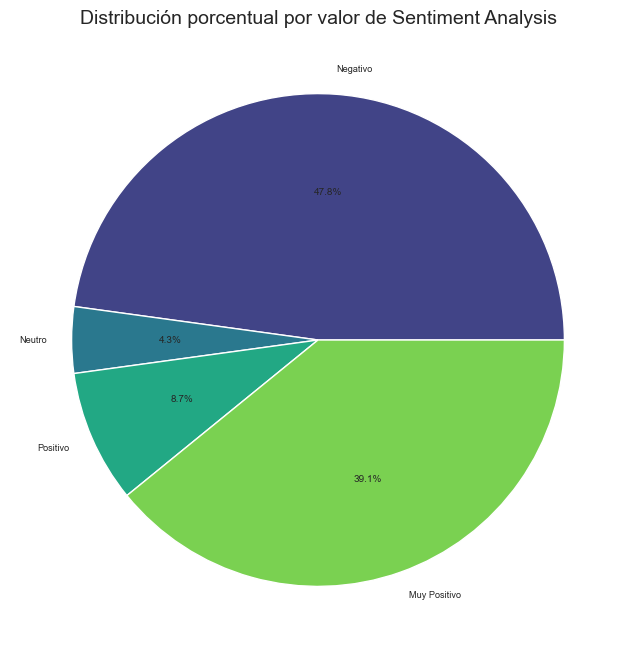

In [144]:
# Configurar el estilo de Seaborn
sns.set_style("whitegrid")

# Tamaño del gráfico
plt.figure(figsize=(8, 8))

# Porcentajes y etiquetas
porcentajes = df_porcentaje['porcentaje']
etiquetas = df_porcentaje['Descripcion']

# Colores
colores = sns.color_palette("viridis", len(etiquetas))

# Graficar el gráfico de torta
plt.pie(porcentajes, labels=etiquetas, autopct='%1.1f%%', colors=colores)

# Título del gráfico
plt.title('Distribución porcentual por valor de Sentiment Analysis', fontsize=14)

# Mostrar el gráfico
plt.show()

Se analizaron las reseñas utilizando un sistema de análisis de sentimiento que las clasificó en cuatro categorías:

* Negativo: Sentimiento negativo hacia el producto o servicio.
* Neutro: Sentimiento neutral o indiferente.
* Positivo: Sentimiento positivo hacia el producto o servicio.
* Muy Positivo: Sentimiento muy favorable hacia el producto o servicio.



La mayoría de las reseñas (47.83%) tienen un sentimiento negativo, lo que indica que hay una considerable insatisfacción. Sin embargo, también hay una cantidad significativa de reseñas con un sentimiento muy positivo (39.13%), lo que indica que algunos clientes están muy satisfechos. El porcentaje de reseñas neutrales es bajo (4.35%).

Sensentiment_analysis mas frecuente por business_id (establecimientos):

In [176]:
# Obtener el valor de 'sentiment_analysis' que más se repite para cada 'business_id'
mode_sentiment = df_review.groupby('business_id')['sentiment_analysis'].agg(lambda x: x.mode().iloc[0]).to_frame()

# Agregamos 'name' correspondiente a cada 'business_id'
mode_sentiment = pd.merge(mode_sentiment, df_review[['business_id', 'name']], on='business_id', how='left').drop_duplicates().sort_values(by='sentiment_analysis', ascending=False).reset_index(drop=True)

# Mostrar el resultado
mode_sentiment

,business_id,sentiment_analysis,name
0,9EoNx6yHsmiCe43XscJzDA,4,Fresh Kitchen
1,WkcmS4_R6iCUdxuNEEcM-Q,4,Grand Hacienda
2,_WXisiele6N-scYh2m8Gmw,4,Carrabba's Italian Grill
3,mDTJ6OVTQhBk6b_wK32YfA,4,Taco Bus
4,rpnuLtrfmYJuQUOVILCdBw,4,Grand Hacienda
5,vtUoFOyhekVSVp5Y-I8ULw,4,Tijuana Flats
6,pi1CtS1L_Rd1NcmO-un1cQ,3,Fresh Kitchen
7,5H5mKgROIfmYKHjFMCePCA,2,Olive Garden Italian Restaurant
8,T6pMNyBC9ouFV2Msdvybgw,1,Chipotle Mexican Grill
9,VQiRR0rLH16C_ldAgqDIzw,1,Chipotle Mexican Grill


Los 6 establecimientos en los que preodominan reviews mas positivas pertenecen a Fresh Kitchen, 2 a Grand Hacienda, Carrabba's Italian Grill, Taco Bus y Tijuana Flats.

Sensentiment_analysis mas frecuente por Franquicia

In [178]:
# Obtener el valor de 'sentiment_analysis' que más se repite para cada 'name'
mode_name = df_review.groupby('name')['sentiment_analysis'].agg(lambda x: x.mode().iloc[0]).to_frame().sort_values(by='sentiment_analysis', ascending=False)

# Mostrar el resultado
mode_name

,sentiment_analysis
name,
Carrabba's Italian Grill,4
Fresh Kitchen,4
Grand Hacienda,4
Taco Bus,4
Olive Garden Italian Restaurant,2
Chipotle Mexican Grill,1
Pizza Hut,1
Taco Bell,1
Tijuana Flats,1


Las franquicias en las que preodominan reviews mas positivas son Carrabba's Italian Grill, Fresh Kitchen, Grand Hacienda, Carrabba's y Taco Bus.

Distribucion de registros de reviews en 24 hs:

C:\Users\ponoh\AppData\Local\Temp\ipykernel_15136\323172414.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_review['H'] = pd.to_datetime(df_review['hour'])


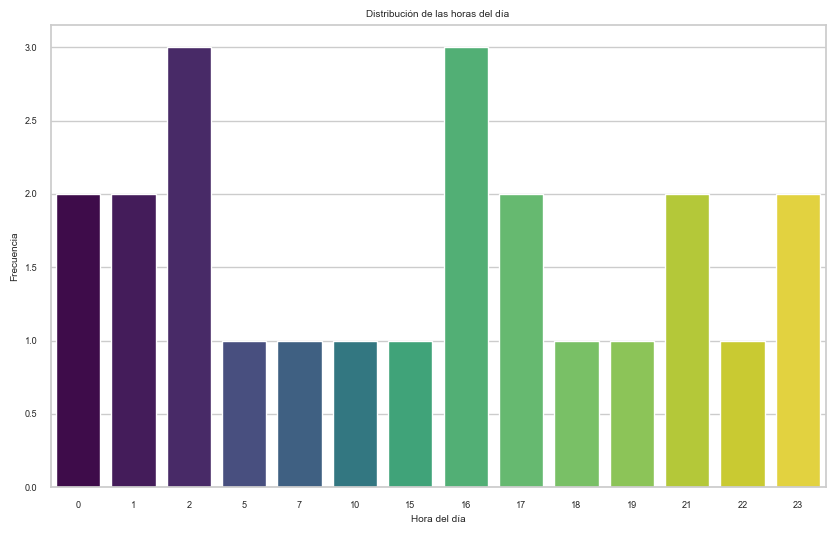

In [145]:
# Convertir la columna 'hour' a tipo datetime
df_review['H'] = pd.to_datetime(df_review['hour'])

# Extraer la hora de cada entrada
df_review['H'] = df_review['H'].dt.hour

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear el countplot
sns.countplot(x='H', data=df_review, palette='viridis', hue='H', legend=False)

# Configurar título y etiquetas de ejes
plt.title('Distribución de las horas del día')
plt.xlabel('Hora del día')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()


Segun el grafico anterior se ve mayor actividad de los usuarios, realizando reviews de los restaurantes desde las 16 hs hasta las 2 hs. Esto concuerda con la actividad y horarios en los que los establecimientos gastronomicos suelen estar abiertos y en los cuales suele concurrir mas clientes.

---

## Google Maps

In [278]:
# Importacion de datasets Google Maps
df_metadata = pd.read_csv('datasets/metadata_sitios_Florida.csv')

df_review_states = pd.read_csv('datasets/review_Florida_Final.csv')

### Metadata

In [201]:
df_metadata.head()

,name,address,city,state,postal_code,latitude,longitude,stars,review_count,categories,hours,gmap_id,url
0,Circle K,100 Gateway Cir,Jacksonville,FL,32259,30.063509,-81.505388,1.8,8,['convenience Store' 'atm' 'diesel Fuel Suppli...,"[array(['Wednesday', 'Open 24 hours'], dtype=o...",0x88e42d57522561e1:0x2aabd91210f232e9,https://www.google.com/maps/place//data=!4m2!3...
1,Kangaroo Express,1209 Monument Rd,Jacksonville,FL,32225,30.342057,-81.537668,3.1,26,['convenience Store' 'atm' 'coffee Shop' 'dies...,"[array(['Wednesday', 'Open 24 hours'], dtype=o...",0x88e5b4a1d816111b:0x38d7071333903369,https://www.google.com/maps/place//data=!4m2!3...
2,Kangaroo,392 N Hathaway Ave,Bronson,FL,32621,29.447731,-82.642001,3.6,7,['convenience Store' 'coffee Shop' 'diesel Fue...,"[array(['Wednesday', '6AM–11PM'], dtype=object...",0x88e8ec2cbe4ec8e3:0x33cd95344d6390a3,https://www.google.com/maps/place//data=!4m2!3...
3,Texaco,7148 Philips Hwy,Jacksonville,FL,32256,30.243029,-81.599758,1.3,8,['gas Station' 'convenience Store' 'diesel Fue...,NaN,0x88e5cafa069f1f99:0x9872a19ecfdab3db,https://www.google.com/maps/place//data=!4m2!3...
4,Kangaroo Express,100 W Miller St,Fruitland Park,FL,34731,28.861915,-81.907142,3.3,8,['convenience Store' 'atm' 'coffee Shop' 'coff...,"[array(['Tuesday', 'Open 24 hours'], dtype=obj...",0x88e7c0e2d7f1ab67:0xb5f9c4c5983a5055,https://www.google.com/maps/place//data=!4m2!3...


In [202]:
df_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          534 non-null    object 
 1   address       534 non-null    object 
 2   city          534 non-null    object 
 3   state         534 non-null    object 
 4   postal_code   534 non-null    int64  
 5   latitude      534 non-null    float64
 6   longitude     534 non-null    float64
 7   stars         534 non-null    float64
 8   review_count  534 non-null    int64  
 9   categories    534 non-null    object 
 10  hours         479 non-null    object 
 11  gmap_id       534 non-null    object 
 12  url           534 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 54.4+ KB


**Descripción general:**

- **Tamaño:** 534 registros (Establecimientos) y 13 columnas (características).
- **Tipos de datos:**
    - `object`: name, address, city, state, categories, hours, gmap_id, url.
    - `int64`: postal_code, review_count.
    - `float64`: stars, latitude, longitude.

- **Variables nominales:**
    - `name`: Nombre del establecimiento.
    - `url`: direccion url de google maps.
    - `gmap_id`: Codigo de localizacion de Google maps.

- **Variables numéricas:**
    - `stars`: Puntaje promedio en 'Estrellas' entre 1 y 5.
    - `review_count`: cantidad de resenias.

- **Variables categóricas:**
    - `address`: Direccion del establecimiento.
    - `city`: Ciudad en la que se encuentra el establecimiento.
    - `state`: Estado en la que se encuentra el establecimiento.
    - `postal_code`: Codigo postal correspondiente a localizacion del establecimiento.
    - `latitude`, `longitude`: Coordenadas del establecimiento.
    - `categories`: Categoria del establecimiento.

- **Variable estructurada**
    - `hours`: dias y horarios en los que se encuentra abierto.

In [203]:
df_metadata.isna().sum()

name             0
address          0
city             0
state            0
postal_code      0
latitude         0
longitude        0
stars            0
review_count     0
categories       0
hours           55
gmap_id          0
url              0
dtype: int64

Se encontraron nulos en las columnas: name, address, description, category, price, hours, MISC, state, relative_results

In [204]:
duplicates_metadata = df_metadata.duplicated('gmap_id')
print(duplicates_metadata.sum())

0


Se encontraron duplicados para la columna `gmap_id`

In [205]:
# Registros duplicados
df_metadata.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
529    False
530    False
531    False
532    False
533    False
Length: 534, dtype: bool

### Analisis de variables

Ciudades

In [219]:
# Filtrar el DataFrame por la columna 'state'
df_metadata = df_metadata.loc[df_metadata['state'] == 'FL']


In [220]:
# Separar establecimientos en gastronomicos y estaciones de servicio
g_restaurants = df_metadata[~df_metadata['categories'].str.contains('|'.join(['Gas Station', 'Gas','Fuel Station','Fuel']))]

g_gas_stations = df_metadata[df_metadata['categories'].str.contains('|'.join(['Gas Station', 'Gas','Fuel Station','Fuel']))]

In [221]:
# Estos registros se consideraran como franquicias al identificarse con el mismo nombre y encontrarse en distintas locaciones
g_restaurants = g_restaurants[g_restaurants.duplicated(subset='name', keep=False)]

In [222]:
# Frecuencias segun la ciudad
frecuencias_city = g_restaurants['city'].value_counts()
# Representacion de porcentajes para cada ciudad
porcentajes = (frecuencias_city / len(g_restaurants) * 100).round(2)

# Realizar un merge basado en la columna 'city'
distribucion_por_ciudad = pd.merge(frecuencias_city, porcentajes, on='city', how='inner')

# Renombrar columnas
distribucion_por_ciudad.rename(columns={'count_x': 'Cant_Restaurantes', 'count_y': '%'}, inplace=True)

# Visualizar
distribucion_por_ciudad

,Cant_Restaurantes,%
city,,
Jacksonville,1,16.67
Naples,1,16.67
Tampa,1,16.67
Brandon,1,16.67
Sunrise,1,16.67
Lakeland,1,16.67


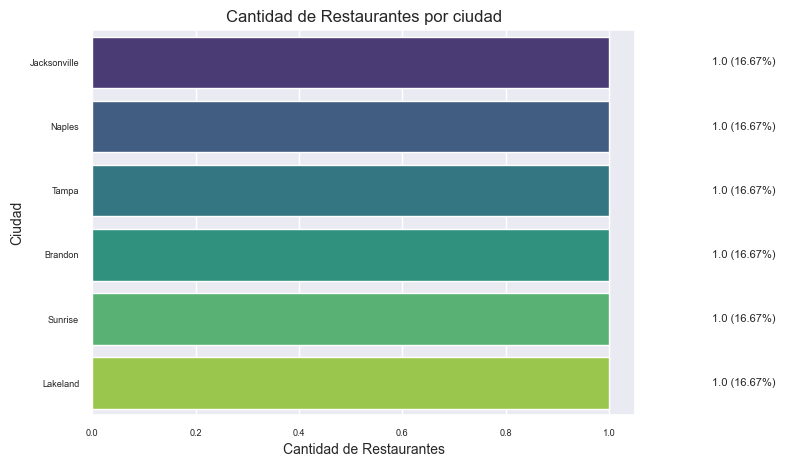

In [223]:
# Calcular el recuento de estaciones de servicio por ciudad
frecuencias_ciudad = g_restaurants['city'].value_counts()

# Calcular el porcentaje relativo para cada ciudad
porcentajes = (frecuencias_ciudad / len(g_restaurants) * 100).round(2)

# Fusionar los resultados en un DataFrame
distribucion_por_ciudad = pd.concat([frecuencias_ciudad, porcentajes], axis=1)
distribucion_por_ciudad.columns = ['Recuento', 'Porcentaje']

# Crear el gráfico de barras con la anchura proporcional al recuento
plt.figure(figsize=(7, 5))
sns.set(font_scale=0.6)
ax = sns.barplot(y=distribucion_por_ciudad.index, x='Recuento', data=distribucion_por_ciudad, palette="viridis", hue='city', dodge=False, legend=False)

# Agregar etiquetas con el recuento y el porcentaje relativo
for i, (index, row) in enumerate(distribucion_por_ciudad.iterrows()):
    count = row['Recuento']
    percentage = row['Porcentaje']
    ax.text(count + 0.2, i, f'{count} ({percentage:.2f}%)', ha='left', va='center', fontsize=8)

plt.title('Cantidad de Restaurantes por ciudad', fontsize=12)
plt.xlabel('Cantidad de Restaurantes', fontsize=10)
plt.ylabel('Ciudad', fontsize=10)

plt.show()

In [224]:
# Frecuencias segun la ciudad
frecuencias_city = g_gas_stations['city'].value_counts()
# Representacion de porcentajes para cada ciudad
porcentajes = (frecuencias_city / len(g_gas_stations) * 100).round(2)

# Realizar un merge basado en la columna 'city'
distribucion_por_ciudad = pd.merge(frecuencias_city, porcentajes, on='city', how='inner')

# Renombrar columnas
distribucion_por_ciudad.rename(columns={'count_x': 'Cant_EstacionesServicio', 'count_y': '%'}, inplace=True)

# Visualizar
distribucion_por_ciudad

,Cant_EstacionesServicio,%
city,,
Miami,37,7.01
Jacksonville,26,4.92
Orlando,22,4.17
Tampa,21,3.98
Lakeland,14,2.65
...,...,...
Oakland Park,1,0.19
Bonita Springs,1,0.19
Key West,1,0.19


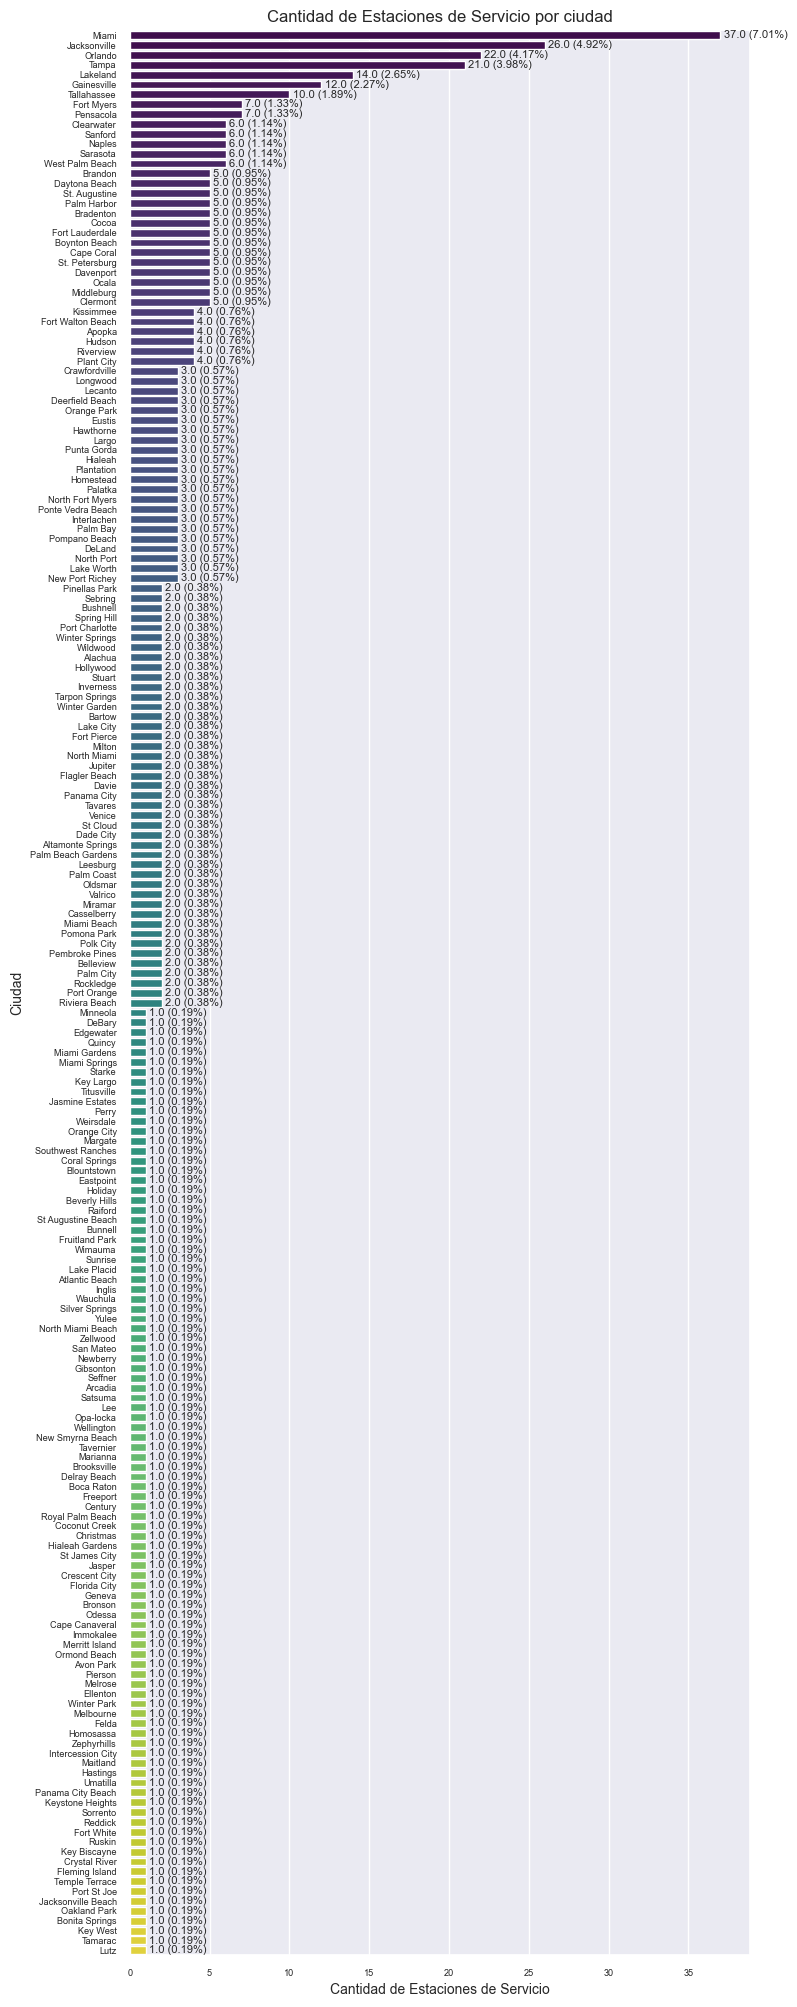

In [225]:
# Calcular el recuento de estaciones de servicio por ciudad
frecuencias_ciudad = g_gas_stations['city'].value_counts()

# Calcular el porcentaje relativo para cada ciudad
porcentajes = (frecuencias_ciudad / len(g_gas_stations) * 100).round(2)

# Fusionar los resultados en un DataFrame
distribucion_por_ciudad = pd.concat([frecuencias_ciudad, porcentajes], axis=1)
distribucion_por_ciudad.columns = ['Recuento', 'Porcentaje']

# Crear el gráfico de barras con la anchura proporcional al recuento
plt.figure(figsize=(8, 25))
sns.set(font_scale=0.6)
ax = sns.barplot(y=distribucion_por_ciudad.index, x='Recuento', data=distribucion_por_ciudad, palette="viridis", hue='city', dodge=False, legend=False)

# Agregar etiquetas con el recuento y el porcentaje relativo
for i, (index, row) in enumerate(distribucion_por_ciudad.iterrows()):
    count = row['Recuento']
    percentage = row['Porcentaje']
    ax.text(count + 0.2, i, f'{count} ({percentage:.2f}%)', ha='left', va='center', fontsize=8)

plt.title('Cantidad de Estaciones de Servicio por ciudad', fontsize=12)
plt.xlabel('Cantidad de Estaciones de Servicio', fontsize=10)
plt.ylabel('Ciudad', fontsize=10)

plt.show()

Franquicias

In [226]:
# Cantidad de franquicias
cant_franc_g = g_restaurants['name'].nunique()
print(f'Se encontraron {cant_franc_g} Franquicias diferentes en el estado de Florida segun los datos de Google Maps')

Se encontraron 3 Franquicias diferentes en el estado de Florida segun los datos de Google Maps


In [228]:
# Calcular el recuento total para cada name
frecuencias_name = g_restaurants['name'].value_counts()

# Calcular el porcentaje relativo para cada name
porcentajes = (frecuencias_name / len(g_restaurants) * 100).round(2)

# Fusionar los resultados en un DataFrame
distribucion_por_franquicia = pd.concat([frecuencias_name, porcentajes], axis=1)
distribucion_por_franquicia.columns = ['Cant_Restaurantes', '%']

# Calcular el recuento de cada name por city
recuento_name_por_ciudad = g_restaurants.groupby(['name', 'city']).size().unstack(fill_value=0)

# Fusionar los resultados con el DataFrame principal
distribucion_por_franquicia = distribucion_por_franquicia.merge(recuento_name_por_ciudad, how='left', left_index=True, right_index=True)

# Visualizar DataFrame
distribucion_por_franquicia

,Cant_Restaurantes,%,Brandon,Jacksonville,Lakeland,Naples,Sunrise,Tampa
name,,,,,,,,
China Wok,2,33.33,0,1,0,1,0,0
Genghis Grill,2,33.33,1,0,0,0,0,1
Asian Chao,2,33.33,0,0,1,0,1,0


En la tabla anterior podemos ver la cantidad de sucursales por franquicia y las ciudades en las que estas se distribuyen

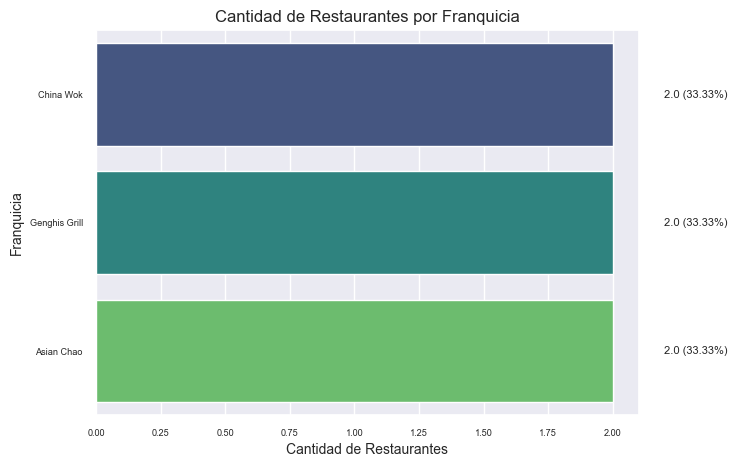

In [229]:
# Calcular el recuento de cada franquicia
frecuencias_name = g_restaurants['name'].value_counts()

# Calcular el porcentaje relativo para cada franquicia
porcentajes = (frecuencias_name / len(g_restaurants) * 100).round(2)

# Fusionar los resultados en un DataFrame
distribucion_por_franquicia = pd.concat([frecuencias_name, porcentajes], axis=1)
distribucion_por_franquicia.columns = ['Recuento', 'Porcentaje']

# Crear el gráfico de barras con la anchura proporcional al recuento
plt.figure(figsize=(7, 5))
sns.set(font_scale=0.6)
ax = sns.barplot(x='Recuento', y=distribucion_por_franquicia.index, data=distribucion_por_franquicia, palette="viridis", hue='name', dodge=False, legend=False)

# Agregar etiquetas con el recuento y el porcentaje relativo
for i, (index, row) in enumerate(distribucion_por_franquicia.iterrows()):
    count = row['Recuento']
    percentage = row['Porcentaje']
    ax.text(count + 0.2, i, f'{count} ({percentage:.2f}%)', ha='left', va='center', fontsize=8)

plt.title('Cantidad de Restaurantes por Franquicia', fontsize=12)
plt.xlabel('Cantidad de Restaurantes', fontsize=10)
plt.ylabel('Franquicia', fontsize=10)

plt.show()

Puntuacion promedio por franquicia

In [230]:
# Calcular la puntuación promedio de cada franquicia
puntuacion_promedio_por_franquicia = g_restaurants.groupby('name')['stars'].mean().round(2).to_frame().sort_values(by='stars', ascending=False)

# Visualizar el resultado
puntuacion_promedio_por_franquicia

,stars
name,
Genghis Grill,4.40
China Wok,3.85
Asian Chao,2.55


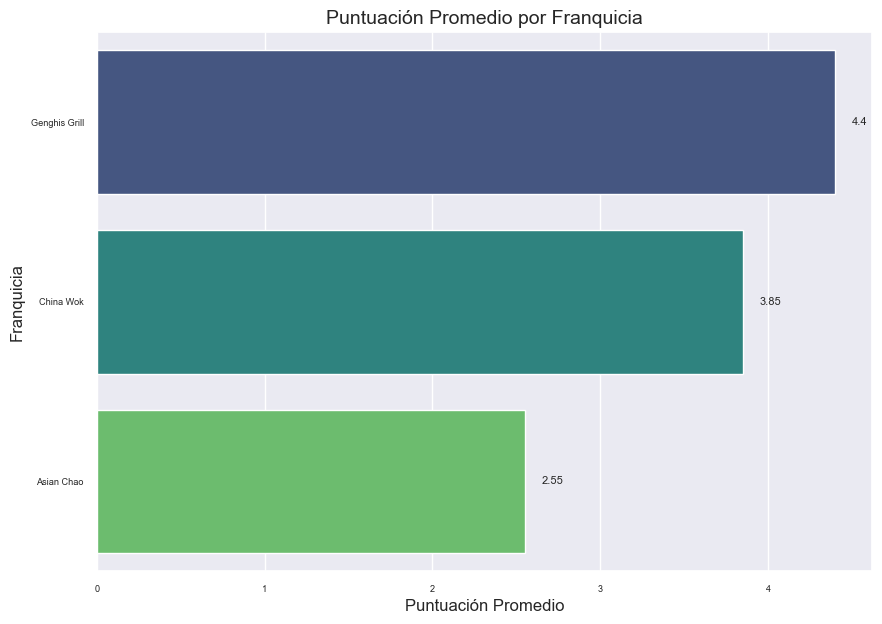

In [231]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 7))
sns.barplot(x='stars', y='name', data=puntuacion_promedio_por_franquicia, palette="viridis", hue='name', dodge=False, legend=False)

# Configurar título y etiquetas de ejes
plt.title('Puntuación Promedio por Franquicia', fontsize=14)
plt.xlabel('Puntuación Promedio', fontsize=12)
plt.ylabel('Franquicia', fontsize=12)

# Agregar etiquetas con el recuento y el porcentaje relativo
for i, (index, row) in enumerate(puntuacion_promedio_por_franquicia.iterrows()):
    prom = row['stars']
    plt.text(prom + 0.1, i, f'{prom}', ha='left', va='center', fontsize=8)

# Mostrar el gráfico
plt.show()

Las franquicias con mejor puntuacion promedio son:
* Genghis Grill	4.40
* China Wok	3.85
* Asian Chao	2.55

Variacion de la puntuacion segun sucursales de la misma franquicia

In [232]:
# Calcular el puntaje promedio de 'stars' según 'name' y 'city'
franquicia_ciudad = g_restaurants[['name', 'city','stars']]

# Ordenar segun Franquicias
franquicia_ciudad = franquicia_ciudad.sort_values('name')
franquicia_ciudad = franquicia_ciudad.reset_index(drop=True)

# Establecer name como indice
franquicia_ciudad = franquicia_ciudad.set_index('name')

# Calcular la Variacion de puntaje entre distintas sucursales de la misma franquicia
franquicia_ciudad['stars_var'] = franquicia_ciudad['stars'].groupby(level=0).var().round(3)

# Reordenar indice por name
franquicia_ciudad = franquicia_ciudad.sort_index()

# Mostrar el DataFrame resultante
franquicia_ciudad

,city,stars,stars_var
name,,,
Asian Chao,Sunrise,1.8,1.125
Asian Chao,Lakeland,3.3,1.125
China Wok,Jacksonville,3.9,0.005
China Wok,Naples,3.8,0.005
Genghis Grill,Tampa,4.4,0.000
Genghis Grill,Brandon,4.4,0.000


1. **Franquicia con Mayor Variación:**
   - Nombre: China Wok
   - Variación: 0.895

2. **Variación Promedio por Franquicia:**
   - Variación Promedio: 0.567
   - Desviación Estándar de la Variación: 0.452

3. **Franquicias con Mayor y Menor Variación:**

| Franquicia             | Variación (stars_var) |
|------------------------|-----------------------|
| Asian Chao             | 0.000                 |
| China Wok              | 0.895                 |
| Genghis Grill          | 0.000                 |

Observación: Las franquicias con mayor variación tienen puntuaciones más dispersas, indicando que algunas sucursales reciben calificaciones muy diferentes. Las franquicias con menor variación tienen puntuaciones más homogéneas, sugiriendo una experiencia consistente en sus distintas sucursales.

Total de reviews por franquicia

In [233]:
franquicias_con_mas_reviews = g_restaurants.groupby('name')['review_count'].sum().to_frame().sort_values(by='review_count', ascending=False).reset_index(drop=False)

# Visualizar el resultado
franquicias_con_mas_reviews.head(10)

,name,review_count
0,Genghis Grill,2752
1,China Wok,143
2,Asian Chao,132


La franquicia con mayor cantidad de reviews es 'Genghis Grill' con 2752 reviews

Relacion entre total de reviews por franquicia y puntuacion promedio

In [237]:
# Añadir la columna 'stars' del DataFrame 'puntuacion_promedio_por_franquicia' a 'franquicias_con_mas_reviews'
franquicias_reviews_puntuacion = pd.merge(franquicias_con_mas_reviews, puntuacion_promedio_por_franquicia[['stars']], on='name')
franquicias_reviews_puntuacion = franquicias_reviews_puntuacion.sort_values(by='review_count', ascending=False)

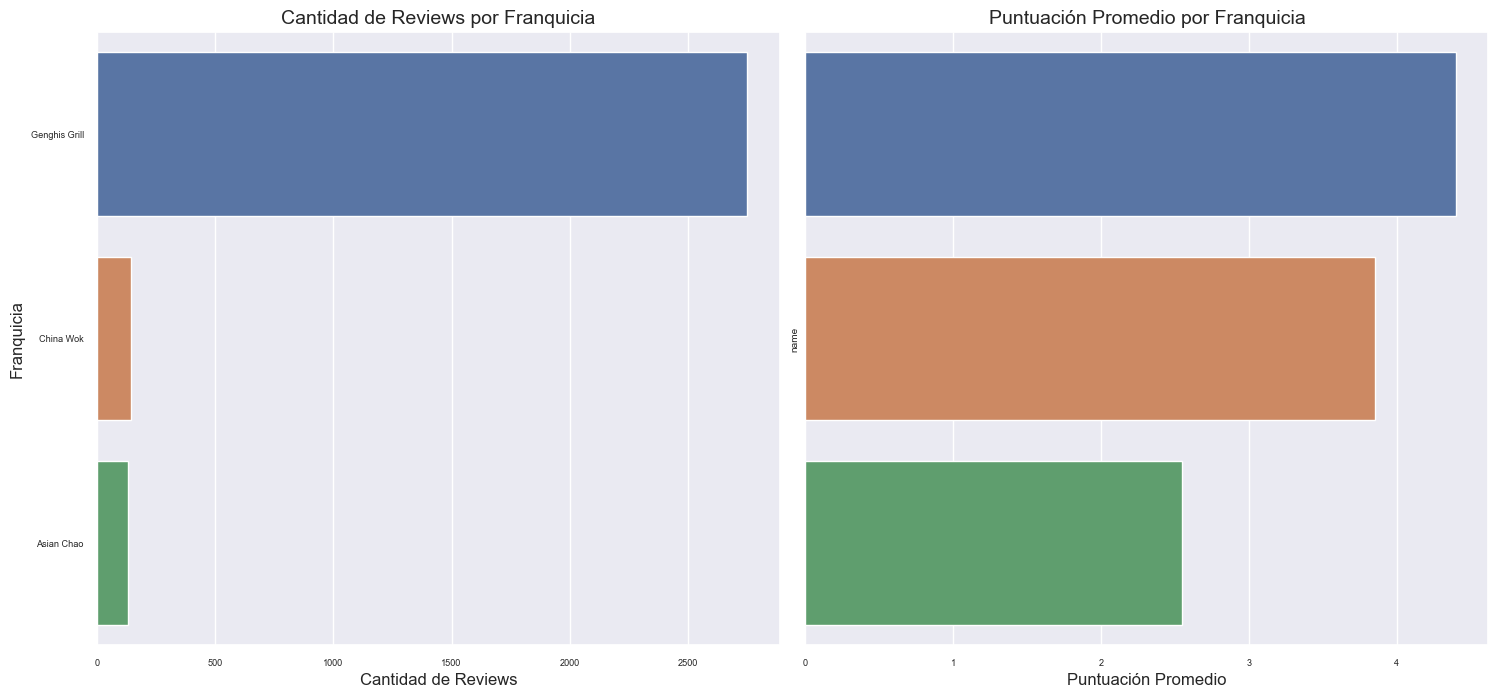

In [238]:
# Configurar el tamaño de la figura
plt.figure(figsize=(15, 7))

# Crear el primer gráfico de barras (cantidad de reviews por franquicia)
plt.subplot(1, 2, 1)  # Organizar en una matriz de 1 fila y 2 columnas, y seleccionar el primer subplot
sns.barplot(x='review_count', y='name', data=franquicias_reviews_puntuacion, hue='name', dodge=False, legend=False)
plt.title('Cantidad de Reviews por Franquicia', fontsize=14)
plt.xlabel('Cantidad de Reviews', fontsize=12)
plt.ylabel('Franquicia', fontsize=12)

# Crear el segundo gráfico de barras (puntuación promedio por franquicia)
plt.subplot(1, 2, 2)  # Seleccionar el segundo subplot
sns.barplot(x='stars', y='name', data=franquicias_reviews_puntuacion, hue='name', dodge=False, legend=False)
plt.title('Puntuación Promedio por Franquicia', fontsize=14)
plt.xlabel('Puntuación Promedio', fontsize=12)
plt.yticks([])  # Ocultar las marcas y etiquetas del eje y del segundo subplot

# Ajustar el diseño y mostrar los gráficos
plt.tight_layout()
plt.show()


Observamos que aquellas en franquicias con mayor cantidad de reviews hay una tendencia a tener una mejor puntuacion si el numero de reviews es mayor. Pero deberian analizarse mayor cantidad de datos para confirmar esta hipotesis.

Categorias:

In [248]:
# Lista de palabras clave
palabras_clave = ['Chinese','Indian','Thai','Italian','Greek','Helthy','Latin','Mexican','Argentinian','Peruvian','Colombian','Arepas','Japanese','Sushi','Ramen','Korean','Vietnamese','Ethiopian','Nigerian','Lebanese','Israeli','Iranian','Asian','African','Middle Eastern','Healthy','Vegetarian','Vegan','Gluten-free','Fresh','Seasonal','Casual']

# Función para encontrar palabras clave en la columna 'categories'
def encontrar_palabra_clave(categories):
    for palabra in palabras_clave:
        if palabra in categories:
            return palabra
    return None

# Crear nueva columna con la palabra clave encontrada
restaurants_categories = g_restaurants[['name','city','state','stars']].copy()
restaurants_categories['keyword'] = g_restaurants['categories'].apply(encontrar_palabra_clave)
restaurants_categories = restaurants_categories.sort_values(by='keyword').reset_index(drop=True)

# Ver restaurants_categories
restaurants_categories.head()

,name,city,state,stars,keyword
0,Genghis Grill,Tampa,FL,4.4,Asian
1,Genghis Grill,Brandon,FL,4.4,Asian
2,Asian Chao,Sunrise,FL,1.8,Asian
3,Asian Chao,Lakeland,FL,3.3,Asian
4,China Wok,Jacksonville,FL,3.9,Chinese


In [249]:
# Contabilizar keywords diferentes
cant_keywords = restaurants_categories['keyword'].nunique()
print(f'Se encontraron {cant_keywords} categorias diferentes entre las franquicias analisadas.')

Se encontraron 2 categorias diferentes entre las franquicias analisadas.


In [250]:
# Frecuencias según la categoría
frecuencias_keyword = restaurants_categories['keyword'].value_counts()

# Representación de porcentajes para cada categoría
porcentajes = (frecuencias_keyword / len(restaurants_categories) * 100).round(2)

# Crear DataFrame para las frecuencias y porcentajes
distribucion_por_categoria = pd.DataFrame({'RestPorCategoria': frecuencias_keyword, '%': porcentajes})

# Resetear el índice para permitir el merge
distribucion_por_categoria.reset_index(inplace=True)

# Renombrar columnas
distribucion_por_categoria.rename(columns={'index': 'keyword'}, inplace=True)

# Visualizar
distribucion_por_categoria

,keyword,RestPorCategoria,%
0,Asian,4,66.67
1,Chinese,2,33.33


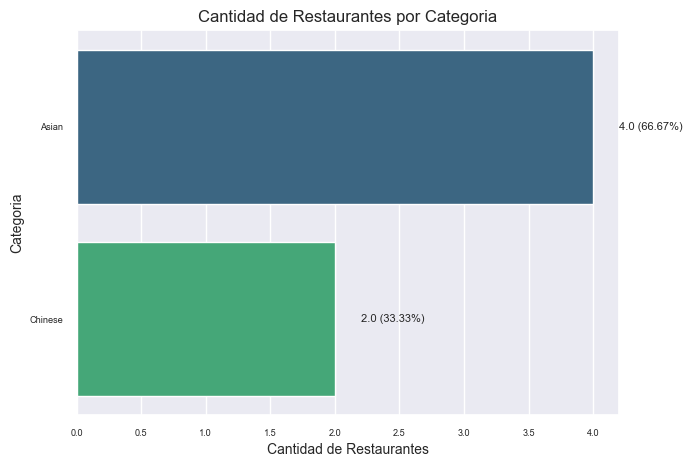

In [251]:
# Calcular el porcentaje relativo para cada franquicia
porcentajes = (frecuencias_keyword / len(g_restaurants) * 100).round(2)

# Fusionar los resultados en un DataFrame
distribucion_por_categoria = pd.concat([frecuencias_keyword, porcentajes], axis=1)
distribucion_por_categoria.columns = ['Recuento', 'Porcentaje']

# Crear el gráfico de barras con la anchura proporcional al recuento
plt.figure(figsize=(7, 5))
sns.set(font_scale=0.6)
ax = sns.barplot(x='Recuento', y=distribucion_por_categoria.index, data=distribucion_por_categoria, palette="viridis", hue='keyword', dodge=False, legend=False)

# Agregar etiquetas con el recuento y el porcentaje relativo
for i, (index, row) in enumerate(distribucion_por_categoria.iterrows()):
    count = row['Recuento']
    percentage = row['Porcentaje']
    ax.text(count + 0.2, i, f'{count} ({percentage:.2f}%)', ha='left', va='center', fontsize=8)

plt.title('Cantidad de Restaurantes por Categoria', fontsize=12)
plt.xlabel('Cantidad de Restaurantes', fontsize=10)
plt.ylabel('Categoria', fontsize=10)

plt.show()

La categoría más popular es Asian con un 66.67% de las palabras clave, seguida por Chinese con un 33.33%. La categoría Chinese podria incluirse como subcategoria de Asian, que representaria el 100% para la data estudiada.

### Reviews

In [260]:
# Obtener los 'gmap_id' únicos de metadata
reviews_restaurants = g_restaurants['gmap_id'].unique()

# Filtrar los registros de df_check_in que coinciden con los 'gmap_id' de metadata
df_review_states = df_review_states[df_review_states['gmap_id'].isin(reviews_restaurants)]

In [255]:
# ESTE FILTRO AUN NO SE APLICARA YA QUE NO CONTAMOS CON DATOS DE 2022 PARA GOOGLE MAPS
# Filtrar las filas que comienzan a partir de "2022" en la columna 'date'
#df_review_states = df_review_states[df_review_states['date'].str.startswith('2022', '2023')].reset_index(drop=True)

In [261]:
df_review_states.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2096 entries, 1629 to 5625
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             2096 non-null   object
 1   name                2096 non-null   object
 2   stars               2096 non-null   int64 
 3   text                1205 non-null   object
 4   gmap_id             2096 non-null   object
 5   date                2096 non-null   object
 6   hour                2096 non-null   object
 7   sentiment_analysis  2096 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 147.4+ KB


**Descripción general:**

- **Tamaño:** 5821 registros (reviews) y 8 columnas (descripcion). Pero no se poseen datos para 2022 aun.
- **Tipos de datos:**
    - `object`: user_id, name, text, gmpa_id, date, hour.
    - `int64`: stars, sentiment_analysis.

- **Variables nominales:**
    - `user_id`: identificador único de usuario.
    - `name`: nombre de usuario.

- **Variables numéricas:**
    - `stars`: Representa las calificaciones en "estrellas" en un rango del 1 al 5, donde 1 es la calificación más baja y 5 es la más alta. 

- **Variables categóricas:**
    - `date`: Fecha en la que se realizo la reseña.
    - `hour`: Hora en la que se realizo la reseña.
    - `sentiment_analysis`: Sentiment analysis de reviews.

In [262]:
df_review_states.describe()

,stars,sentiment_analysis
count,2096.000000,2096.000000
mean,4.324427,1.724714
std,1.035270,1.018717
min,1.000000,1.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,2.000000
max,5.000000,4.000000


In [263]:
df_review_states.duplicated().sum()

0

No se encontraron duplicados

In [280]:
df_review_states = df_review_states.drop('text', axis=1)

In [281]:
df_review_states.isna().sum()

user_id               0
name                  0
stars                 0
gmap_id               0
date                  0
hour                  0
sentiment_analysis    0
dtype: int64

No se encontraron nulos

In [265]:
# Conteo para saber cuales son los establecimientos con mayor numero de reseñas
df_review_states['gmap_id'].value_counts()

gmap_id
0x88c2ce6c7b7053fb:0x87756709cc7965d     1462
0x88c2c09de34db42b:0x31dd6523dc0548d2     534
0x88db1d5897406fb3:0x5d21a4edd6c8648c      52
0x88d9090159779007:0xd7fa3762aaaa8c3f      38
0x88e44b81316de4cf:0xa057b5ada48dc8db      10
Name: count, dtype: int64

In [266]:
# Número de clientes que opinan más de una vez sobre el mismo establecimiento
clientes_establecimiento = df_review_states.groupby(['user_id', 'gmap_id']).size().reset_index(name='count')
clientes_multiples_reseñas = clientes_establecimiento[clientes_establecimiento['count'] > 1]

# Número de clientes que opinan solo una vez sobre el mismo establecimiento
clientes_reseñas_unicas = clientes_establecimiento[clientes_establecimiento['count'] == 1]

# Contar el número de 'user_id' para cada grupo 
numero_clientes_multiples_reseñas = clientes_multiples_reseñas['user_id'].nunique()
numero_clientes_reseñas_unicas = clientes_reseñas_unicas['user_id'].nunique()

# Proporción de clientes con múltiples o solo una reseña para el mismo establacimiento
proporcion_clientes_multiples_reseñas = numero_clientes_multiples_reseñas / df_review_states['user_id'].nunique() * 100
proporcion_clientes_reseñas_unicas = numero_clientes_reseñas_unicas / df_review_states['user_id'].nunique() * 100

# Rango de establecimientos diferentes sobre los cuales cada cliente deja su reseña
rangos_por_user = df_review_states.groupby('user_id')['gmap_id'].nunique()

print(f"Rango de establecimientos diferentes sobre los cuales cada cliente deja su reseña")
print(rangos_por_user)
print(f"Clientes con mas de una reseña por establecimiento: {proporcion_clientes_multiples_reseñas}%")
print(f"Clientes con solo una reseña por establecimiento: {proporcion_clientes_reseñas_unicas}%")

Rango de establecimientos diferentes sobre los cuales cada cliente deja su reseña
user_id
100001819655887553305    1
100006125613632478505    1
100008340223499415544    1
100022946873248756655    1
100024821941365587092    1
                        ..
118420036813234582039    1
118433024711527139119    1
118435090898850660521    1
118440156224101222109    1
118440337548473797270    1
Name: gmap_id, Length: 2050, dtype: int64
Clientes con mas de una reseña por establecimiento: 0.0%
Clientes con solo una reseña por establecimiento: 100.0%


In [267]:
# Mapeamos 'gmap_id' a 'name' en un diccionario
id_to_name = dict(zip(g_restaurants['gmap_id'], g_restaurants['name']))

# Creamos una nueva columna 'name' en df_review_states usando el diccionario de mapeo
df_review_states['name'] = df_review_states['gmap_id'].map(id_to_name)
df_review_states

,user_id,name,stars,text,gmap_id,date,hour,sentiment_analysis
1629,116217166524985579211,China Wok,1,I order the Bourbon chicken And it was very d...,0x88e44b81316de4cf:0xa057b5ada48dc8db,2021-05-25,22:03:02,1
1630,110397867830220172806,China Wok,5,Favorite Chinese take out ever. You can’t go w...,0x88e44b81316de4cf:0xa057b5ada48dc8db,2020-10-21,02:11:26,4
1631,101806628646129203754,China Wok,5,These guys are great!\nConsistently putting ou...,0x88e44b81316de4cf:0xa057b5ada48dc8db,2020-11-12,21:37:18,3
1632,104067120695956964884,China Wok,5,We shamelessly ordered from here twice last we...,0x88e44b81316de4cf:0xa057b5ada48dc8db,2020-08-26,01:51:20,3
1633,105016635326156095736,China Wok,5,"Fast, kind and very good.",0x88e44b81316de4cf:0xa057b5ada48dc8db,2020-07-04,20:26:20,3
...,...,...,...,...,...,...,...,...
5621,112464661474043342305,Asian Chao,5,NaN,0x88d9090159779007:0xd7fa3762aaaa8c3f,2019-07-17,03:44:13,1
5622,103234645216206429584,Asian Chao,1,NaN,0x88d9090159779007:0xd7fa3762aaaa8c3f,2020-07-29,14:08:17,1
5623,103176168738705952620,Asian Chao,5,NaN,0x88d9090159779007:0xd7fa3762aaaa8c3f,2021-03-18,18:30:39,1
5624,108308803608450295336,Asian Chao,1,NaN,0x88d9090159779007:0xd7fa3762aaaa8c3f,2019-10-14,20:02:50,1


Variacion de puntajes otorgados por cada 'user_id'

In [268]:
'''# Calcular el puntaje promedio de 'stars' según 'name' y 'city'
user_stars = df_review_states[['user_id','stars']]

# Establecer name como indice
user_stars = user_stars.set_index('user_id')

# Calcular la Variacion de puntaje entre distintas sucursales de la misma franquicia
user_stars['stars_var'] = user_stars['stars'].groupby(level=0).var().round(3)

# Reordenar indice por name
user_stars = user_stars.sort_index()

# Mostrar el DataFrame resultante
user_stars'''

"# Calcular el puntaje promedio de 'stars' según 'name' y 'city'\nuser_stars = df_review_states[['user_id','stars']]\n\n# Establecer name como indice\nuser_stars = user_stars.set_index('user_id')\n\n# Calcular la Variacion de puntaje entre distintas sucursales de la misma franquicia\nuser_stars['stars_var'] = user_stars['stars'].groupby(level=0).var().round(3)\n\n# Reordenar indice por name\nuser_stars = user_stars.sort_index()\n\n# Mostrar el DataFrame resultante\nuser_stars"

_Aun no hay suficientes datos para realizar este analisis_

Sentiment Analysis:

In [269]:
# Calcula la cantidad de registros para cada valor único en 'sentiment_analysis'
sentiment_counts = df_review_states['sentiment_analysis'].value_counts()

# Calcula el total de registros en el DataFrame
total_registros = len(df_review_states)

# Calcula el porcentaje de cada valor único en 'sentiment_analysis' respecto al total de registros
porcentaje_por_valor = ((sentiment_counts / total_registros) * 100).round(2)

# Convierte los resultados en un DataFrame para facilitar su manipulación
df_porcentaje = porcentaje_por_valor.reset_index()
df_porcentaje.columns = ['sentiment_analysis', 'porcentaje']
df_porcentaje = df_porcentaje.sort_values(by='sentiment_analysis', ascending=True).reset_index(drop=True)
df_porcentaje['Descripcion'] = ['Negativo','Neutro','Positivo','Muy Positivo']

# Visualizar resultado
df_porcentaje

,sentiment_analysis,porcentaje,Descripcion
0,1,60.78,Negativo
1,2,14.60,Neutro
2,3,15.98,Positivo
3,4,8.64,Muy Positivo


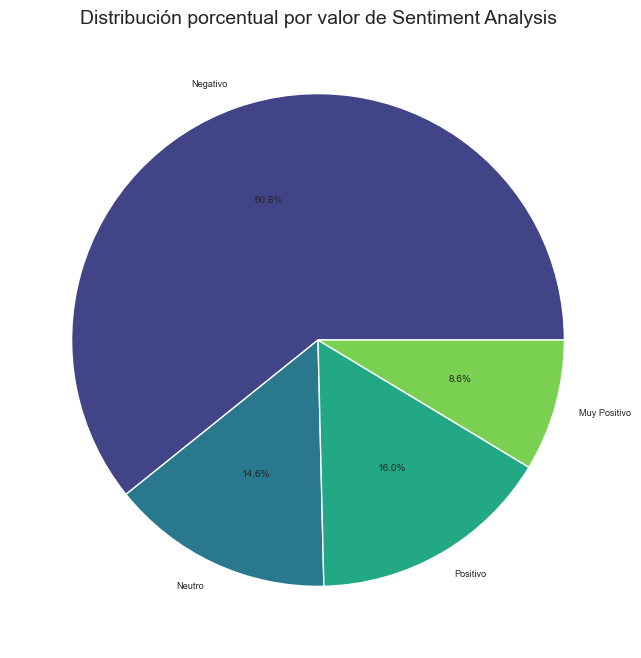

In [270]:
# Configurar el estilo de Seaborn
sns.set_style("whitegrid")

# Tamaño del gráfico
plt.figure(figsize=(8, 8))

# Porcentajes y etiquetas
porcentajes = df_porcentaje['porcentaje']
etiquetas = df_porcentaje['Descripcion']

# Colores
colores = sns.color_palette("viridis", len(etiquetas))

# Graficar el gráfico de torta
plt.pie(porcentajes, labels=etiquetas, autopct='%1.1f%%', colors=colores)

# Título del gráfico
plt.title('Distribución porcentual por valor de Sentiment Analysis', fontsize=14)

# Mostrar el gráfico
plt.show()

Se analizaron las reseñas utilizando un sistema de análisis de sentimiento que las clasificó en cuatro categorías:

* Negativo: Sentimiento negativo hacia el producto o servicio.
* Neutro: Sentimiento neutral o indiferente.
* Positivo: Sentimiento positivo hacia el producto o servicio.
* Muy Positivo: Sentimiento muy favorable hacia el producto o servicio.

La mayoría de las reseñas (60.8%) tienen un sentimiento negativo, lo que indica que hay una considerable insatisfacción. La cantidad de reseñas con sentimiento positivo representa (16%), lo que indica que algunos pocos clientes están muy satisfechos respecto del total. El porcentaje de reseñas neutrales es medio (14.6%). El porcentaje de reseñas muy buenas es bajo (8.6%).

Sensentiment_analysis mas frecuente por business_id (establecimientos):

In [271]:
# Obtener el valor de 'sentiment_analysis' que más se repite para cada 'gmap_id'
mode_sentiment = df_review_states.groupby('gmap_id')['sentiment_analysis'].agg(lambda x: x.mode().iloc[0]).to_frame()

# Agregamos 'name' correspondiente a cada 'gmap_id'
mode_sentiment = pd.merge(mode_sentiment, df_review_states[['gmap_id', 'name']], on='gmap_id', how='left').drop_duplicates().sort_values(by='sentiment_analysis', ascending=False).reset_index(drop=True)

# Mostrar el resultado
mode_sentiment

,gmap_id,sentiment_analysis,name
0,0x88c2c09de34db42b:0x31dd6523dc0548d2,1,Genghis Grill
1,0x88c2ce6c7b7053fb:0x87756709cc7965d,1,Genghis Grill
2,0x88d9090159779007:0xd7fa3762aaaa8c3f,1,Asian Chao
3,0x88db1d5897406fb3:0x5d21a4edd6c8648c,1,China Wok
4,0x88e44b81316de4cf:0xa057b5ada48dc8db,1,China Wok


Las franquicias consideradas en este analisis tienen todas mayor cantidad de reviews negativas.

Sensentiment_analysis mas frecuente por Franquicia

In [272]:
# Obtener el valor de 'sentiment_analysis' que más se repite para cada 'name'
mode_name = df_review_states.groupby('name')['sentiment_analysis'].agg(lambda x: x.mode().iloc[0]).to_frame().sort_values(by='sentiment_analysis', ascending=False)

# Mostrar el resultado
mode_name

,sentiment_analysis
name,
Asian Chao,1
China Wok,1
Genghis Grill,1


Las franquicias consideradas en este analisis tienen todas mayor cantidad de reviews negativas.

C:\Users\ponoh\AppData\Local\Temp\ipykernel_15136\323172414.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_review['H'] = pd.to_datetime(df_review['hour'])


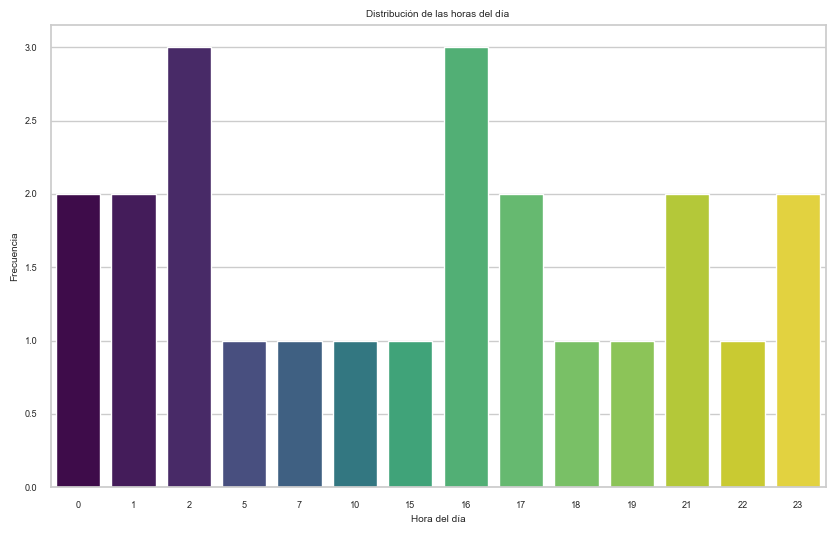

In [ ]:
# Convertir la columna 'hour' a tipo datetime
df_review['H'] = pd.to_datetime(df_review['hour'])

# Extraer la hora de cada entrada
df_review['H'] = df_review['H'].dt.hour

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear el countplot
sns.countplot(x='H', data=df_review, palette='viridis', hue='H', legend=False)

# Configurar título y etiquetas de ejes
plt.title('Distribución de las horas del día')
plt.xlabel('Hora del día')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()


Distribucion de registros de reviews en 24 hs:

C:\Users\ponoh\AppData\Local\Temp\ipykernel_15136\297495324.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_review_states['H'] = pd.to_datetime(df_review_states['hour'])


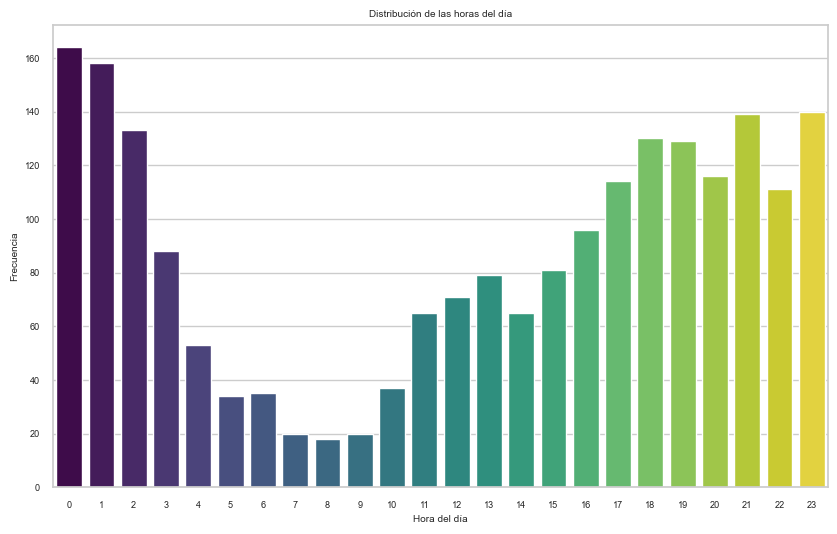

In [273]:
# Convertir la columna 'hour' a tipo datetime
df_review_states['H'] = pd.to_datetime(df_review_states['hour'])

# Extraer la hora de cada entrada
df_review_states['H'] = df_review_states['H'].dt.hour

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear el countplot
sns.countplot(x='H', data=df_review_states, palette='viridis', hue='H', legend=False)

# Configurar título y etiquetas de ejes
plt.title('Distribución de las horas del día')
plt.xlabel('Hora del día')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

Segun el grafico anterior se ve mayor actividad de los usuarios, realizando reviews de los restaurantes desde las 16 hs hasta las 2 hs. Esto concuerda con la actividad y horarios en los que los establecimientos gastronomicos suelen estar abiertos y en los cuales suele concurrir mas clientes.

La cantidad de reviews tiene tendencia a crecer desde las 8 a 00 hs donde comienza a decrecer nuevamente